In [1]:
pip install cpnet

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv('witcher_network.csv')
df.head()

Unnamed: 0   Source   Target        Type  Weight  book
0           0  Velerad   Geralt  Undirected       1     1
1           1   Geralt  Foltest  Undirected       5     1
2           2  Foltest   Geralt  Undirected       4     1
3           3     Adda   Geralt  Undirected       1     1
4           4   Geralt   Ostrit  Undirected       4     1

# Pre processing

In [4]:
# remove unuseful columns
df = df.drop(labels='Unnamed: 0', axis=1)
df = df.drop(labels='Type', axis=1)
df = df.rename(columns={'book': 'Book'})

df

Source     Target  Weight  Book
0       Velerad     Geralt       1     1
1        Geralt    Foltest       5     1
2       Foltest     Geralt       4     1
3          Adda     Geralt       1     1
4        Geralt     Ostrit       4     1
...         ...        ...     ...   ...
2595      Lytta       Ciri       2     7
2596      Lytta      Triss       1     7
2597      Triss  Dandelion       1     7
2598      Triss     Yarpen       1     7
2599  Dandelion     Mistle       1     7

[2600 rows x 4 columns]

In [5]:
# sort in lexicographical order Source and Target
df['Source'], df['Target'] = zip(*df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# groupby: Among rows with same Source, Target and Book select the one with largest weight
df_proc = df.groupby(['Source', 'Target', 'Book']).agg({'Weight': 'max'}).reset_index()

In [6]:
# save dataframe in csv
# df_proc.to_csv('df_grouped.csv', index=False)
#print(df_proc.shape)
#print(df.shape)

In [7]:
df_proc

Source     Target  Book  Weight
0       Adalia       Anna     5       1
1       Adalia     Assire     5       2
2       Adalia   Calanthe     5       1
3       Adalia  Francesca     5       1
4       Adalia  Margarita     5       1
...        ...        ...   ...     ...
1765    Yarpen   Yennefer     3       1
1766    Yarpen   Yennefer     4       2
1767    Yarpen     Zoltan     7       8
1768  Yennefer      Yurga     2       1
1769  Yennefer     Zoltan     7       1

[1770 rows x 4 columns]

# Graph creation

Creating the graphs for all 7 books

In [8]:
# subgraphs for all 7 books

df_book1 = df_proc[df_proc['Book']==1]
df_book2 = df_proc[df_proc['Book']==2]
df_book3 = df_proc[df_proc['Book']==3]
df_book4 = df_proc[df_proc['Book']==4]
df_book5 = df_proc[df_proc['Book']==5]
df_book6 = df_proc[df_proc['Book']==6]
df_book7 = df_proc[df_proc['Book']==7]

In [9]:
# Create a graph from the dataframe
G_1 = nx.from_pandas_edgelist(df_book1, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(df_book2, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(df_book3, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(df_book4, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(df_book5, 'Source', 'Target', edge_attr=True)
G_6 = nx.from_pandas_edgelist(df_book6, 'Source', 'Target', edge_attr=True)
G_7 = nx.from_pandas_edgelist(df_book7, 'Source', 'Target', edge_attr=True)

# create a graph for all books
G_all = nx.from_pandas_edgelist(df_proc, 'Source', 'Target', edge_attr=True)


In [10]:
# Draw the graph
#plt.figure(figsize=(20, 20))
#nx.draw(G_5, with_labels=True)
#plt.show()

Dataframes for nodes and edges + save as csv files -> used for Gephi visualization

In [11]:
# Create a DataFrame for nodes
df_nodes1 = pd.DataFrame(G_1.nodes(), columns=['Nodes'])
df_nodes2 = pd.DataFrame(G_2.nodes(), columns=['Nodes'])
df_nodes3 = pd.DataFrame(G_3.nodes(), columns=['Nodes'])
df_nodes4 = pd.DataFrame(G_4.nodes(), columns=['Nodes'])
df_nodes5 = pd.DataFrame(G_5.nodes(), columns=['Nodes'])
df_nodes6 = pd.DataFrame(G_6.nodes(), columns=['Nodes'])
df_nodes7 = pd.DataFrame(G_7.nodes(), columns=['Nodes'])
df_nodes_all = pd.DataFrame(G_all.nodes(), columns=['Nodes'])

# print("Nodes of graph G_1:")
# print(df_nodes1)

In [12]:
# Create a DataFrame for edges
df_edges1 = pd.DataFrame(list(G_1.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges2 = pd.DataFrame(list(G_2.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges3 = pd.DataFrame(list(G_3.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges4 = pd.DataFrame(list(G_4.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges5 = pd.DataFrame(list(G_5.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges6 = pd.DataFrame(list(G_6.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges7 = pd.DataFrame(list(G_7.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges_all = pd.DataFrame(list(G_all.edges(data=True)), columns=['Source', 'Target', 'Attributes'])

# print("Edges of graph G_1:")
# print(df_edges1)


In [13]:
df_edges1.head()

Source   Target                Attributes
0     Adda  Foltest  {'Book': 1, 'Weight': 1}
1     Adda   Geralt  {'Book': 1, 'Weight': 2}
2  Foltest   Geralt  {'Book': 1, 'Weight': 5}
3  Foltest   Ostrit  {'Book': 1, 'Weight': 1}
4  Foltest      Two  {'Book': 1, 'Weight': 1}

In [14]:
# Creation of column "Book" and "Weight" -> (apply a lambda function to the "Attributes" column)
df_edges1[['Book', 'Weight']] = df_edges1['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges2[['Book', 'Weight']] = df_edges2['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges3[['Book', 'Weight']] = df_edges3['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges4[['Book', 'Weight']] = df_edges4['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges5[['Book', 'Weight']] = df_edges5['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges6[['Book', 'Weight']] = df_edges6['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges7[['Book', 'Weight']] = df_edges7['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))
df_edges_all[['Book', 'Weight']] = df_edges_all['Attributes'].apply(lambda x: pd.Series([x['Book'], x['Weight']]))

# Drop of the "Attributes" column
df_edges1.drop('Attributes', axis=1, inplace=True)
df_edges2.drop('Attributes', axis=1, inplace=True)
df_edges3.drop('Attributes', axis=1, inplace=True)
df_edges4.drop('Attributes', axis=1, inplace=True)
df_edges5.drop('Attributes', axis=1, inplace=True)
df_edges6.drop('Attributes', axis=1, inplace=True)
df_edges7.drop('Attributes', axis=1, inplace=True)
df_edges_all.drop('Attributes', axis = 1, inplace = True)

In [15]:
df_edges1.head()

Source   Target  Book  Weight
0     Adda  Foltest     1       1
1     Adda   Geralt     1       2
2  Foltest   Geralt     1       5
3  Foltest   Ostrit     1       1
4  Foltest      Two     1       1

Download of the edges and nodes dataframes

In [16]:
!mkdir nodes_gephi
!mkdir edges_gephi

In [17]:
# Save nodes DataFrame to a CSV file
df_nodes1.to_csv('nodes_gephi/nodes_book1.csv', index=False)
df_nodes2.to_csv('nodes_gephi/nodes_book2.csv', index=False)
df_nodes3.to_csv('nodes_gephi/nodes_book3.csv', index=False)
df_nodes4.to_csv('nodes_gephi/nodes_book4.csv', index=False)
df_nodes5.to_csv('nodes_gephi/nodes_book5.csv', index=False)
df_nodes6.to_csv('nodes_gephi/nodes_book6.csv', index=False)
df_nodes7.to_csv('nodes_gephi/nodes_book7.csv', index=False)
df_nodes_all.to_csv('nodes_gephi/nodes_all.csv', index=False)


# Save edges DataFrame to a CSV file
df_edges1.to_csv('edges_gephi/edges_book1.csv', index=False)
df_edges2.to_csv('edges_gephi/edges_book2.csv', index=False)
df_edges3.to_csv('edges_gephi/edges_book3.csv', index=False)
df_edges4.to_csv('edges_gephi/edges_book4.csv', index=False)
df_edges5.to_csv('edges_gephi/edges_book5.csv', index=False)
df_edges6.to_csv('edges_gephi/edges_book6.csv', index=False)
df_edges7.to_csv('edges_gephi/edges_book7.csv', index=False)
df_edges_all.to_csv('edges_gephi/edges_all.csv', index=False)

In [18]:
!zip -r /content/edges_gephi.zip /content/edges_gephi
!zip -r /content/nodes_gephi.zip /content/nodes_gephi

  adding: content/edges_gephi/ (stored 0%)
  adding: content/edges_gephi/edges_book5.csv (deflated 75%)
  adding: content/edges_gephi/edges_book7.csv (deflated 75%)
  adding: content/edges_gephi/edges_book2.csv (deflated 69%)
  adding: content/edges_gephi/edges_book6.csv (deflated 73%)
  adding: content/edges_gephi/edges_book4.csv (deflated 75%)
  adding: content/edges_gephi/edges_all.csv (deflated 75%)
  adding: content/edges_gephi/edges_book3.csv (deflated 73%)
  adding: content/edges_gephi/edges_book1.csv (deflated 73%)
  adding: content/nodes_gephi/ (stored 0%)
  adding: content/nodes_gephi/nodes_book1.csv (deflated 34%)
  adding: content/nodes_gephi/nodes_book5.csv (deflated 35%)
  adding: content/nodes_gephi/nodes_book2.csv (deflated 25%)
  adding: content/nodes_gephi/nodes_book7.csv (deflated 37%)
  adding: content/nodes_gephi/nodes_book4.csv (deflated 36%)
  adding: content/nodes_gephi/nodes_book3.csv (deflated 32%)
  adding: content/nodes_gephi/nodes_book6.csv (deflated 34%)
 

In [19]:
from google.colab import files
files.download("/content/edges_gephi.zip")
files.download("/content/nodes_gephi.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Measures

## Degree Centrality

Number of edges connected to a node

In [20]:
#compute degree centrality
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_6 = nx.degree_centrality(G_6)
degree_7 = nx.degree_centrality(G_7)
degree_all = nx.degree_centrality(G_all)

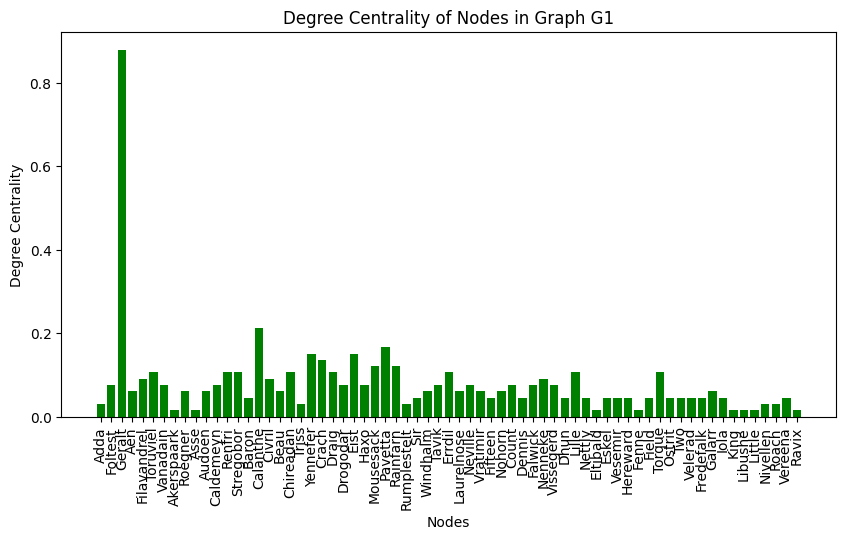

In [21]:
# show the histogram of degree centrality values for each node

# book1
degree_nodes_1 = degree_1.keys()
degree_centralities_1 = degree_1.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_1, degree_centralities_1, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [22]:
# # BOOK2
# degree_nodes_2 = degree_2.keys()
# degree_centralities_2 = degree_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_2, degree_centralities_2, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK3
# degree_nodes_3 = degree_3.keys()
# degree_centralities_3= degree_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_3, degree_centralities_3, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()



# # BOOK4
# degree_nodes_4 = degree_4.keys()
# degree_centralities_4= degree_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_4, degree_centralities_4, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK5
# degree_nodes_5 = degree_5.keys()
# degree_centralities_5= degree_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_5, degree_centralities_5, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# # BOOK6
# degree_nodes_6 = degree_6.keys()
# degree_centralities_6 = degree_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_6, degree_centralities_6, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# # BOOK7
# degree_nodes_7 = degree_7.keys()
# degree_centralities_7= degree_7.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_7, degree_centralities_7, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()


#ALL BOOKS
# degree_nodes_all = degree_all.keys()
# degree_centralities_all = degree_all.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_all, degree_centralities_all, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in the whole graph')
# plt.xticks(rotation=90)
# plt.show()

In [23]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes (with more edges)
threshold = 0.2 # we have to choose a value

high_degree_nodes_1 = [node for node, deg in degree_1.items() if deg > threshold]
high_degree_nodes_2 = [node for node, deg in degree_2.items() if deg > threshold]
high_degree_nodes_3 = [node for node, deg in degree_3.items() if deg > threshold]
high_degree_nodes_4 = [node for node, deg in degree_4.items() if deg > threshold]
high_degree_nodes_5 = [node for node, deg in degree_5.items() if deg > threshold]
high_degree_nodes_6 = [node for node, deg in degree_6.items() if deg > threshold]
high_degree_nodes_7 = [node for node, deg in degree_7.items() if deg > threshold]
high_degree_nodes_all = [node for node, deg in degree_all.items() if deg > threshold]

print("Graph 1 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_1)
print("Graph 2 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_2)
print("Graph 3 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_3)
print("Graph 4 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_4)
print("Graph 5 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_5)
print("Graph 6 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_6)
print("Graph 7 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_7)
print("Whole Graph - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_all)


Graph 1 - Nodes with degree centrality above  0.2 :  ['Geralt', 'Calanthe']
Graph 2 - Nodes with degree centrality above  0.2 :  ['Braenn', 'Geralt', 'Dandelion', 'Ciri', 'Yurga']
Graph 3 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Yennefer', 'Dandelion', 'Geralt', 'Calanthe', 'Foltest', 'King', 'Rience', 'Triss']
Graph 4 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Codringher', 'Emhyr', 'Geralt', 'Yennefer', 'Gar', 'Philippa', 'Tissaia', 'Vilgefortz', 'Sabrina']
Graph 5 - Nodes with degree centrality above  0.2 :  ['Assire', 'Francesca', 'Sabrina', 'Yennefer', 'Dandelion', 'Fringilla', 'Geralt', 'Ida', 'Milva', 'Philippa', 'Ciri', 'Cahir', 'Emhyr', 'Zoltan']
Graph 6 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Geralt', 'Baron', 'Emhyr']
Graph 7 - Nodes with degree centrality above  0.2 :  ['Ciri', 'King', 'Yennefer', 'Dandelion', 'Geralt', 'Emhyr']
Whole Graph - Nodes with degree centrality above  0.2 :  ['Yennefer', 'Ciri', 'Geralt', 'Dandelion', 'Emhyr

#### Degree centrality ***distribution***

Frequency of each degree value

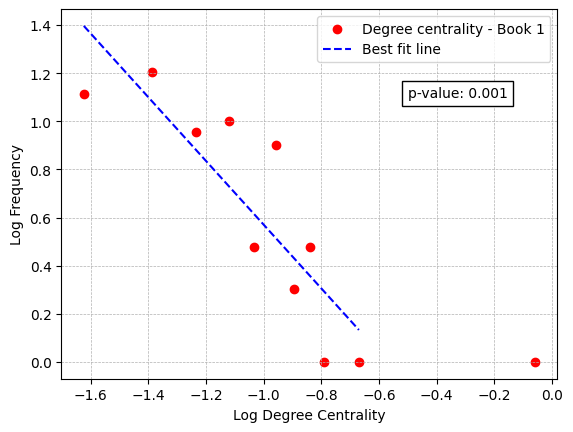

The slope of the line is: -1.3247535339398941


In [24]:
# BOOK 1

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_1 = list(degree_1.values())
freq, bins = np.histogram(values_1, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit -> namely Geralt since it's an outlier
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 1')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
#plt.title('Log Degree Centrality Distribution G_1 - Book 1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.50, 1.1, f'p-value: {p_value:.3f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

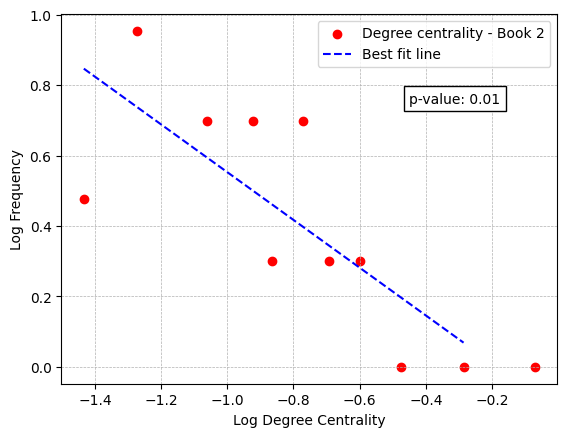

The slope of the line is: -0.6782442374655144


In [25]:
# BOOK 2

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_2 = list(degree_2.values())
freq, bins = np.histogram(values_2, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 2')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.45, 0.75, f'p-value: {p_value:.2f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

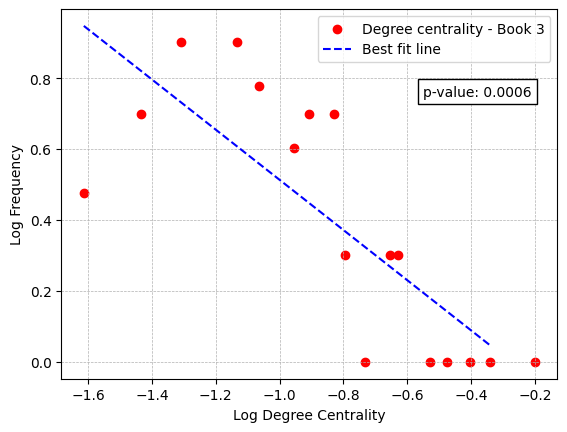

The slope of the line is: -0.7074924985387276


In [26]:
# BOOK 3

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_3 = list(degree_3.values())
freq, bins = np.histogram(values_3, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 3')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.55, 0.75, f'p-value: {p_value:.4f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

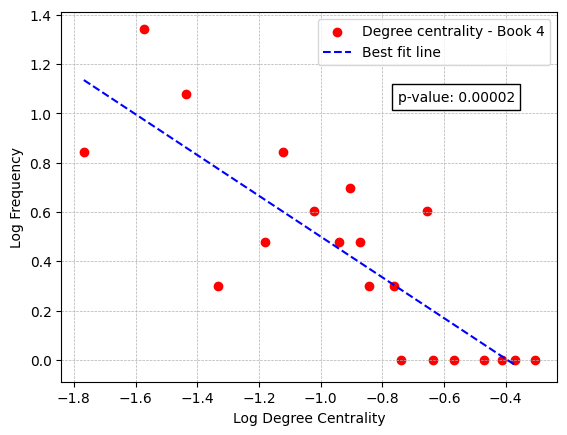

The slope of the line is: -0.826810247309156


In [27]:
# BOOK 4

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_4 = list(degree_4.values())
freq, bins = np.histogram(values_4, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 4')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.75, 1.05, f'p-value: {p_value:.5f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

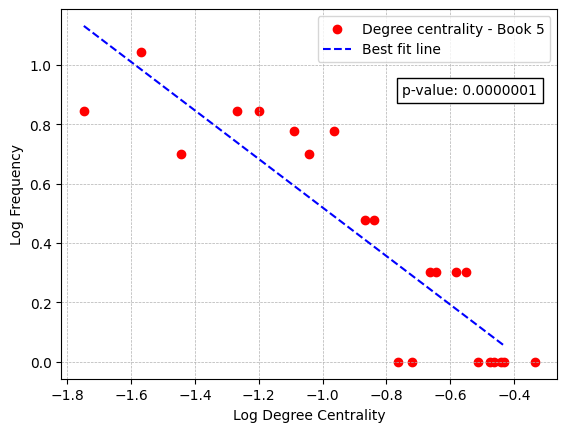

The slope of the line is: -0.816865493464208


In [28]:
# BOOK 5

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_5 = list(degree_5.values())
freq, bins = np.histogram(values_5, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 5')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.75, 0.9, f'p-value: {p_value:.7f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

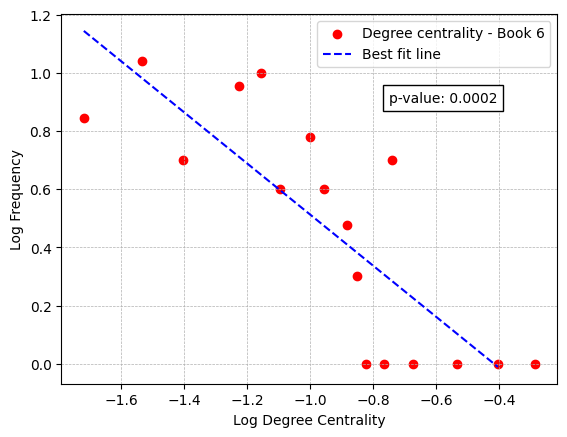

The slope of the line is: -0.8796093458044584


In [29]:
# BOOK 6

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_6 = list(degree_6.values())
freq, bins = np.histogram(values_6, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 6')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.75, 0.9, f'p-value: {p_value:.4f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

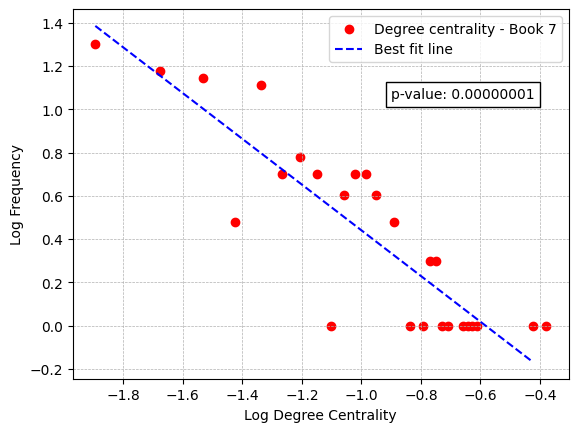

The slope of the line is: -1.0560698185721864


In [30]:
# BOOK 7

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_7 = list(degree_7.values())
freq, bins = np.histogram(values_7, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - Book 7')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.9, 1.05, f'p-value: {p_value:.8f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

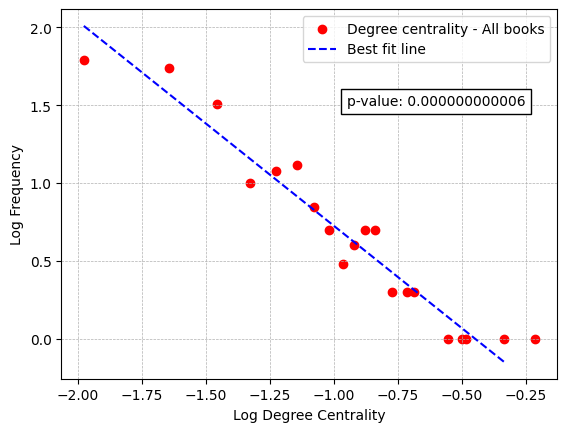

The slope of the line is: -1.3160263476016292


In [31]:
# BOOK ALL

# FIT OF THE DEGREE CENTRALITY DISTRIBUTION WITH LOG VALUES
values_all = list(degree_all.values())
freq, bins = np.histogram(values_all, bins=50)

# Calculate bin centers
x = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
y = freq  # y = occurrence

# Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(y > 0)
x_display = x[non_zero_indices]
y_display = y[non_zero_indices]

# Exclude the last value for the fit
fit_points = np.where(x_display < np.max(x_display))
x_fit = x_display[fit_points]
y_fit = y_display[fit_points]

# Take the logarithm of x and y
log_x_display = np.log10(x_display)
log_y_display = np.log10(y_display)
log_x_fit = np.log10(x_fit)
log_y_fit = np.log10(y_fit)

# Fit a straight line to the data
coeffs = np.polyfit(log_x_fit, log_y_fit, 1)

# Generate y-values for the fitted line
fitted_y = coeffs[0] * log_x_fit + coeffs[1]

# Perform linear regression and get p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_fit, log_y_fit) # r_value -> is the pearson correlation coefficient
                                                                                     # p_value -> degree of confidence in rejecting the null hypothesis (the lower the better)
plt.scatter(log_x_display, log_y_display, color='r', label='Degree centrality - All books')
plt.plot(log_x_fit, fitted_y, 'b--', label='Best fit line')  # Plot fitted line
plt.legend()
plt.xlabel('Log Degree Centrality')
plt.ylabel('Log Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.text(-0.95, 1.5, f'p-value: {p_value:.12f}', bbox=dict(facecolor='white')) # Add p-value to the plot at the upper right corner

plt.show()

print(f"The slope of the line is: {slope}")

### Cumulative Distribution for Degree Centrality

In [32]:
# # for debugging, to check if the frequecies are actual frequencies (the total sum must be 1).

# counts, bin_edges = np.histogram(values, bins=60, weights=np.ones(len(values)) / len(values))


# total_sum = 0

# for i in range(len(counts)):
#   total_sum = total_sum + counts[i]

# print(total_sum) # should be 1

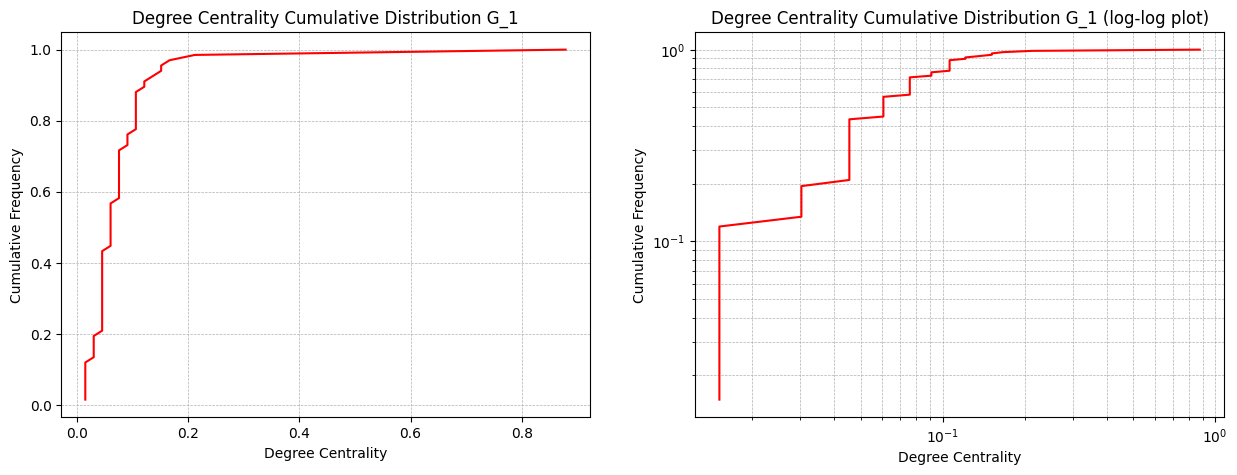

In [33]:
# cumulative distribution
# BOOK1

# Extract the values and compute the frequencies
values = list(degree_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values)) #each point has probability 1/67, on it you apply the cumulative function to do the sum of these probabilities at each point i in the array

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot( 1, 2, 2)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)


# Show the plot
plt.show()


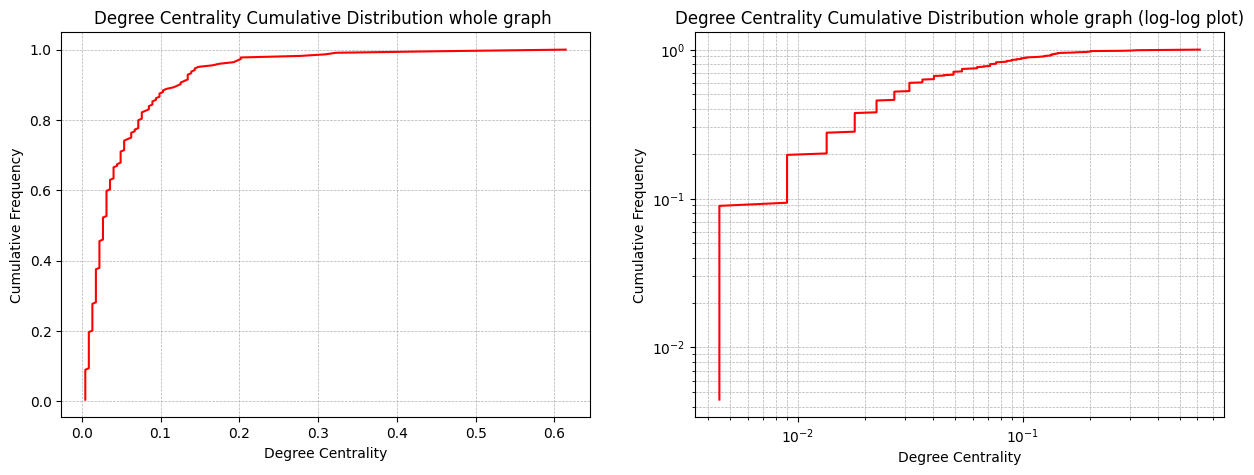

In [34]:
# cumulative distribution
# ALL BOOKS

# Extract the values and compute the frequencies
values_all = list(degree_all.values())
values_all.sort()

# Compute the cumulative frequencies
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution whole graph ')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot( 1, 2, 2)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Centrality Cumulative Distribution whole graph (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)


# Show the plot
plt.show()


## Eigenvector centrality

In [35]:
eig_centrality_1 = nx.eigenvector_centrality(G_1, weight='Weight')
eig_centrality_2 = nx.eigenvector_centrality(G_2, weight='Weight')
eig_centrality_3 = nx.eigenvector_centrality(G_3, weight='Weight')
eig_centrality_4 = nx.eigenvector_centrality(G_4, weight='Weight')
eig_centrality_5 = nx.eigenvector_centrality(G_5, weight='Weight')
eig_centrality_6 = nx.eigenvector_centrality(G_6, weight='Weight')
eig_centrality_7 = nx.eigenvector_centrality(G_7, weight='Weight')
eig_centrality_all = nx.eigenvector_centrality(G_all, weight = 'Weight')

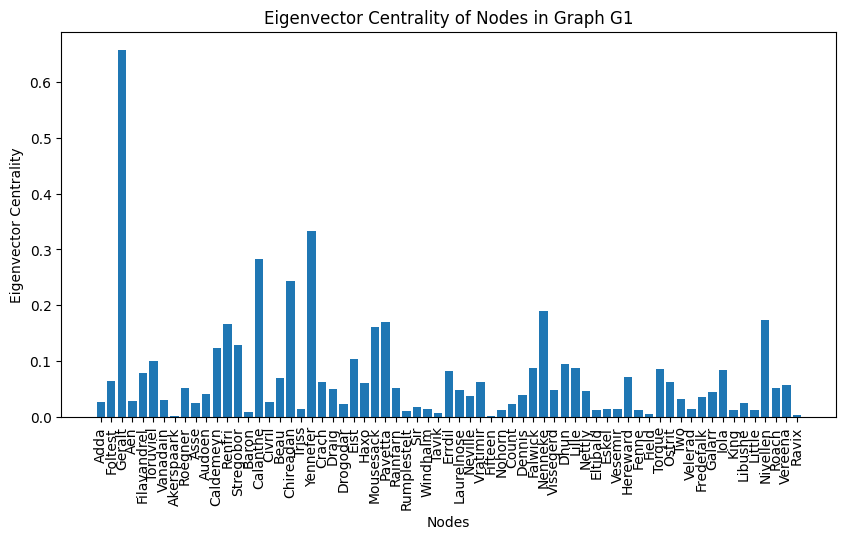

In [36]:
# BOOK 1
nodes = eig_centrality_1.keys()
centralities = eig_centrality_1.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [37]:
# # BOOK 2
# nodes = eig_centrality_2.keys()
# centralities = eig_centrality_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# nodes = eig_centrality_3.keys()
# centralities = eig_centrality_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4
# nodes = eig_centrality_4.keys()
# centralities = eig_centrality_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 5
# nodes = eig_centrality_5.keys()
# centralities = eig_centrality_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 6
# nodes = eig_centrality_6.keys()
# centralities = eig_centrality_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 7
# nodes = eig_centrality_7.keys()
# centralities = eig_centrality_7.values()

# plt.figure(figsize=(20,5))
# plt.bar(nodes, centralities)
# plt.xlabel('Nodes')
# plt.ylabel('Eigenvector Centrality')
# plt.title('Eigenvector Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Eigenvector centrality *distribution* -> # SCATTER PLOT

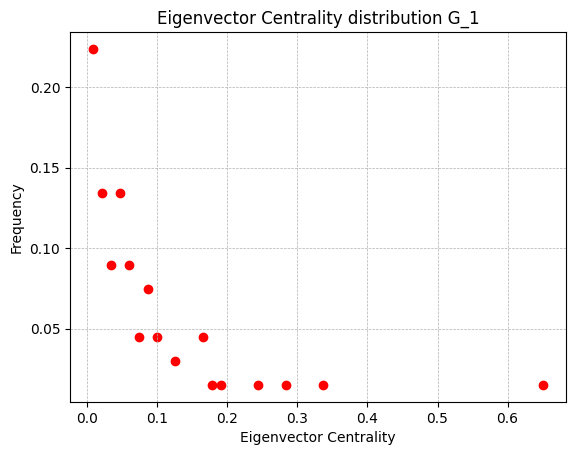

In [38]:
# BOOK1
values_1 = list(eig_centrality_1.values())
tot_nodes = df_nodes1.shape[0]
freq, bins = np.histogram(values_1, bins=50)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/tot_nodes for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

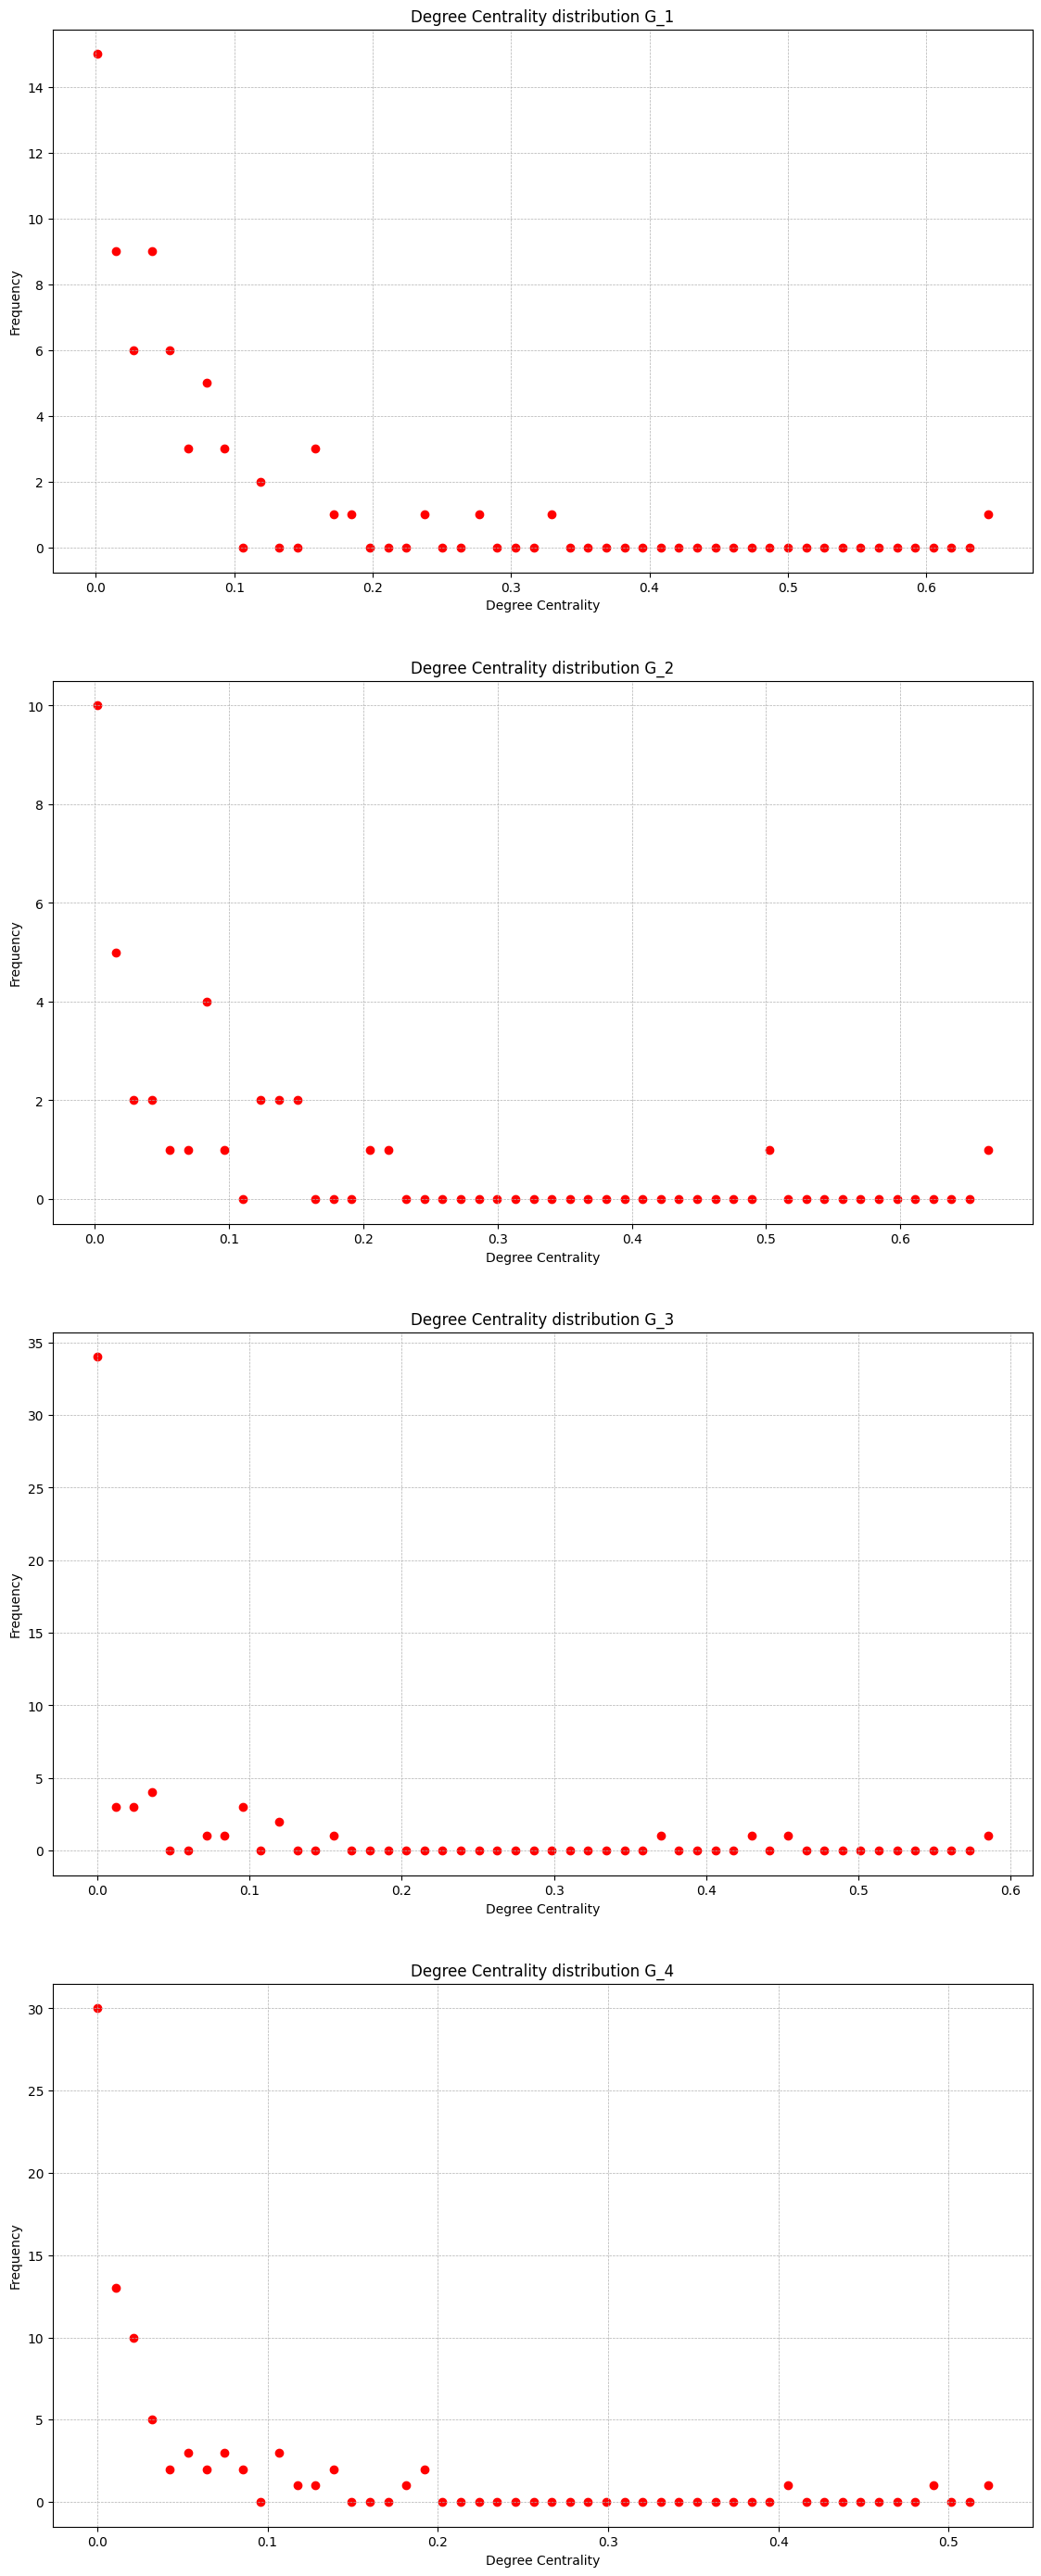

In [39]:
# SCATTER PLOT

values_1 = list(eig_centrality_1.values())
values_2 = list(eig_centrality_2.values())
values_3 = list(eig_centrality_3.values())
values_4 = list(eig_centrality_4.values())

plt.figure(figsize=(30, 35))

# BOOK1
plt.subplot(4, 2, 1)
freq, bins = np.histogram(values_1, bins=50)
plt.scatter(bins[:-1], freq, color='r')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# BOOK2
plt.subplot(4, 2, 3)
freq, bins = np.histogram(values_2, bins=50)
plt.scatter(bins[:-1], freq, color='r')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# BOOK3
plt.subplot(4, 2, 5)
freq, bins = np.histogram(values_3, bins=50)
plt.scatter(bins[:-1], freq, color='r')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# BOOK4
plt.subplot(4, 2, 7)
freq, bins = np.histogram(values_4, bins=50)
plt.scatter(bins[:-1], freq, color='r')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality distribution G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)



plt.show()

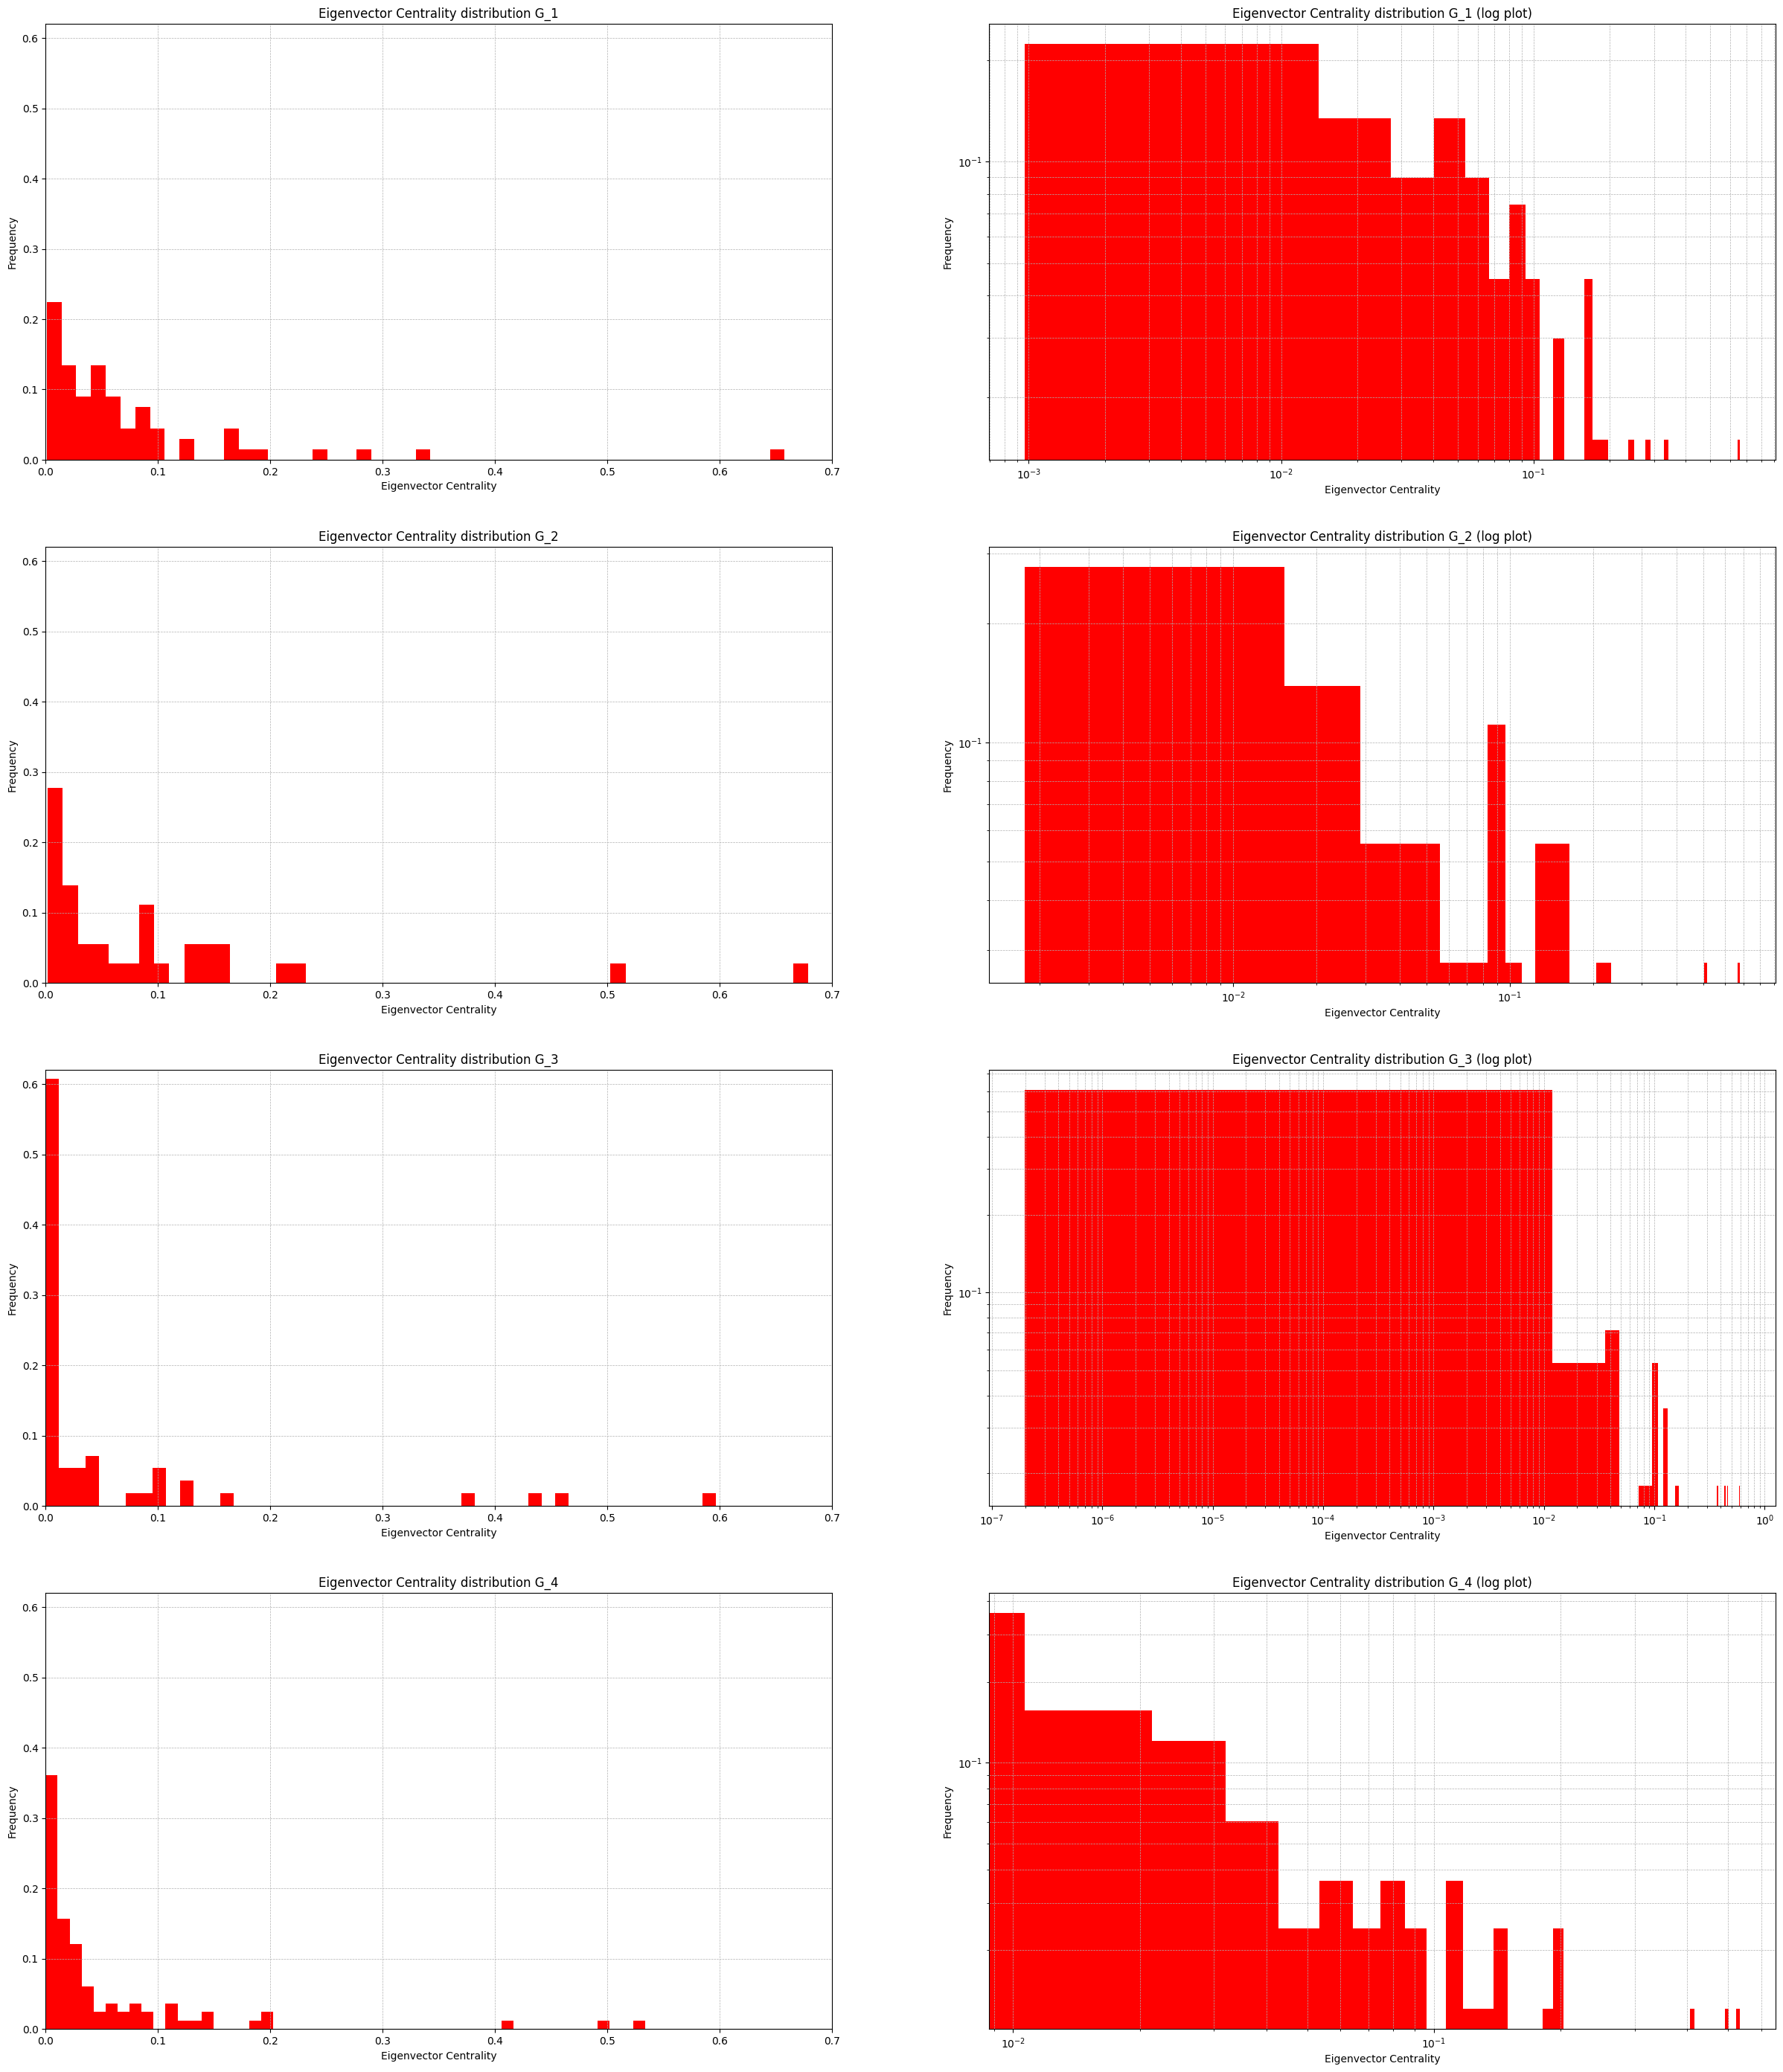

In [40]:
# from BOOK1 TO BOOK 4
# (normal scale on the left, log scale on the right)

values_1 = list(eig_centrality_1.values())
values_2 = list(eig_centrality_2.values())
values_3 = list(eig_centrality_3.values())
values_4 = list(eig_centrality_4.values())

plt.figure(figsize=(30, 35))

plt.subplot(4, 2, 1)
plt.hist(values_1, bins=50, color = 'r', weights=np.ones(len(values_1)) / len(values_1)) # for the report, choose a better # of bins
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_1')
plt.xlim(0, 0.7)
plt.ylim(0, 0.62)
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(4, 2, 2)
plt.hist(values_1, bins=50, color = 'r', weights=np.ones(len(values_1)) / len(values_1), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)


#BOOK2
plt.subplot(4, 2, 3)
plt.hist(values_2, bins=50, color = 'r', weights=np.ones(len(values_2)) / len(values_2)) # for the report, choose a better # of bins
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_2')
plt.xlim(0, 0.7)
plt.ylim(0, 0.62)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 4)
plt.hist(values_2, bins=50, color = 'r', weights=np.ones(len(values_2)) / len(values_2), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_2 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK3
plt.subplot(4, 2, 5)
plt.hist(values_3, bins=50, color = 'r', weights=np.ones(len(values_3)) / len(values_3))
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_3')
plt.xlim(0, 0.7)
plt.ylim(0, 0.62)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 6)
plt.hist(values_3, bins=50, color = 'r', weights=np.ones(len(values_3)) / len(values_3), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_3 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK4
plt.subplot(4, 2, 7)
plt.hist(values_4, bins=50, color = 'r', weights=np.ones(len(values_4)) / len(values_4))
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_4')
plt.xlim(0, 0.7)
plt.ylim(0, 0.62)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 8)
plt.hist(values_4, bins=50, color = 'r', weights=np.ones(len(values_4)) / len(values_4), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_4 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


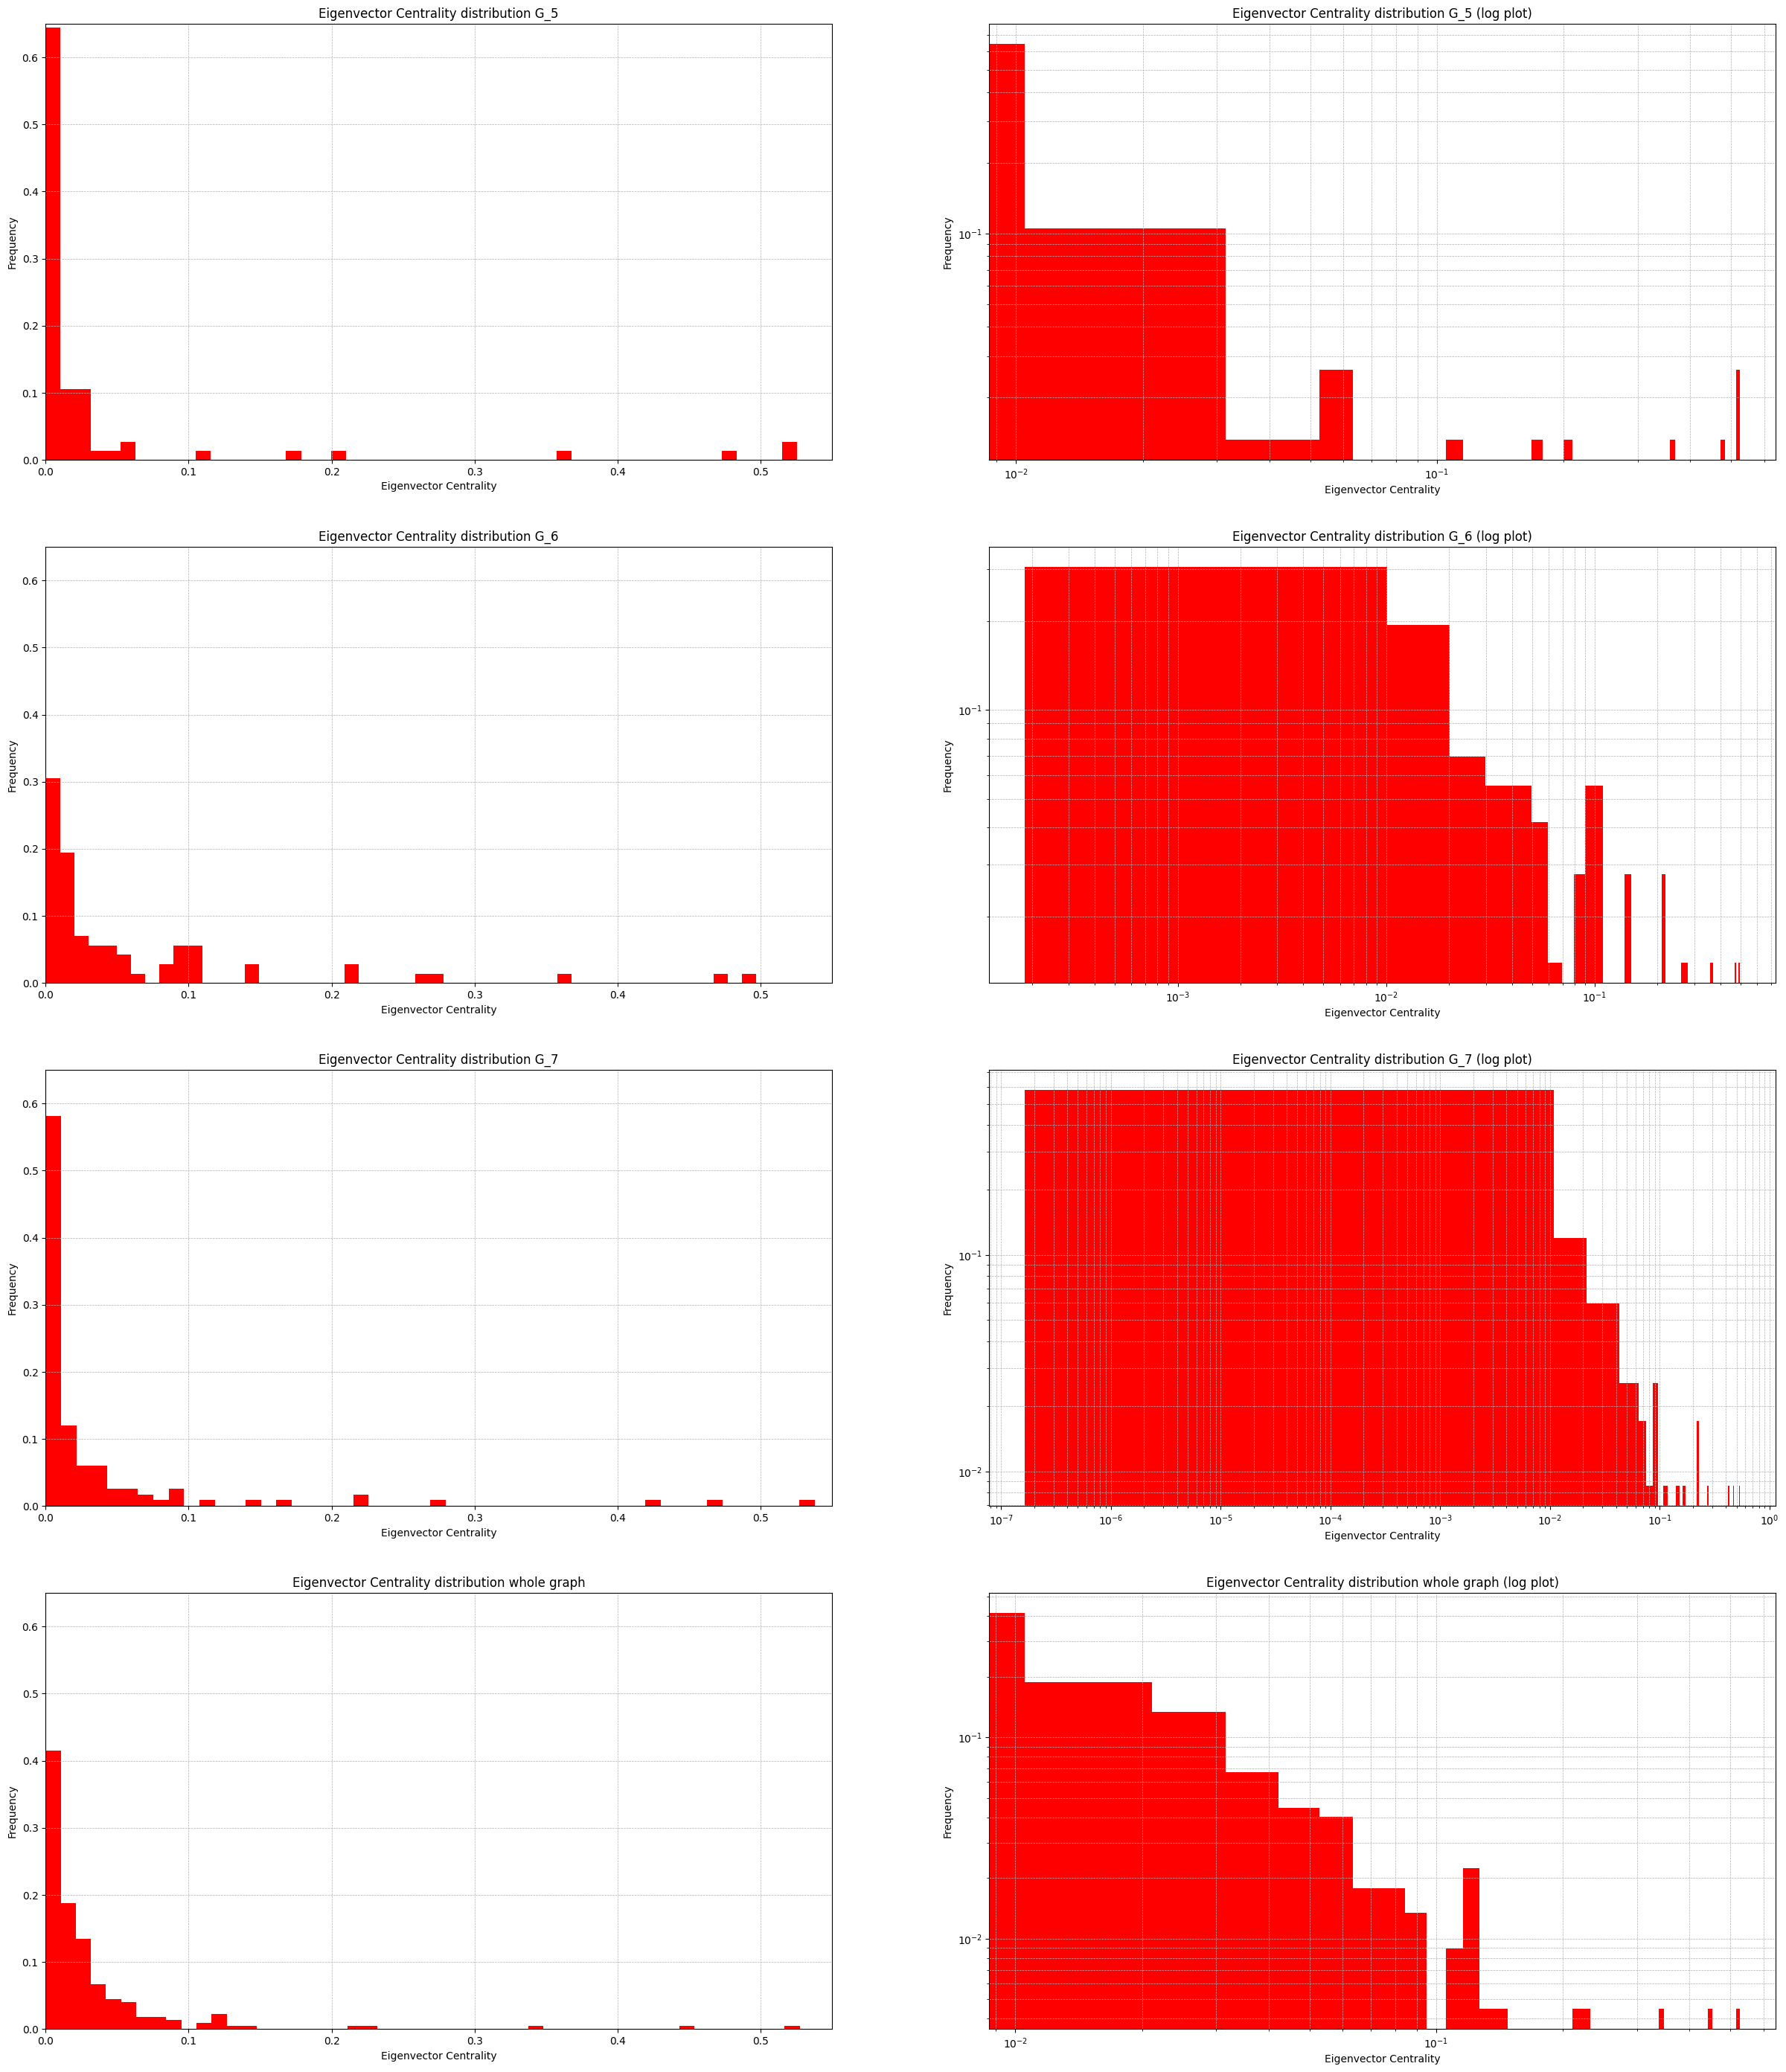

In [41]:
# from BOOK5 TO BOOK 8

values_5 = list(eig_centrality_5.values())
values_6 = list(eig_centrality_6.values())
values_7 = list(eig_centrality_7.values())
values_all = list(eig_centrality_all.values())


plt.figure(figsize=(30, 35))

plt.subplot(4, 2, 1)
plt.hist(values_5, bins=50, color = 'r', weights=np.ones(len(values_5)) / len(values_5)) # for the report, choose a better # of bins
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_5')
plt.xlim(0, 0.55)
plt.ylim(0, 0.65)
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(4, 2, 2)
plt.hist(values_5, bins=50, color = 'r', weights=np.ones(len(values_5)) / len(values_5), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_5 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)


#BOOK6
plt.subplot(4, 2, 3)
plt.hist(values_6, bins=50, color = 'r', weights=np.ones(len(values_6)) / len(values_6)) # for the report, choose a better # of bins
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_6')
plt.xlim(0, 0.55)
plt.ylim(0, 0.65)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 4)
plt.hist(values_6, bins=50, color = 'r', weights=np.ones(len(values_6)) / len(values_6), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_6 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK7
plt.subplot(4, 2, 5)
plt.hist(values_7, bins=50, color = 'r', weights=np.ones(len(values_7)) / len(values_7))
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_7')
plt.xlim(0, 0.55)
plt.ylim(0, 0.65)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 6)
plt.hist(values_7, bins=50, color = 'r', weights=np.ones(len(values_7)) / len(values_7), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_7 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#ALL
plt.subplot(4, 2, 7)
plt.hist(values_all, bins=50, color = 'r', weights=np.ones(len(values_all)) / len(values_all))
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution whole graph')
plt.xlim(0, 0.55)
plt.ylim(0, 0.65)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 8)
plt.hist(values_all, bins=50, color = 'r', weights=np.ones(len(values_all)) / len(values_all), log = True)
plt.xscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution whole graph (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


### Cumulative Distribution for Eigenvector Centrality

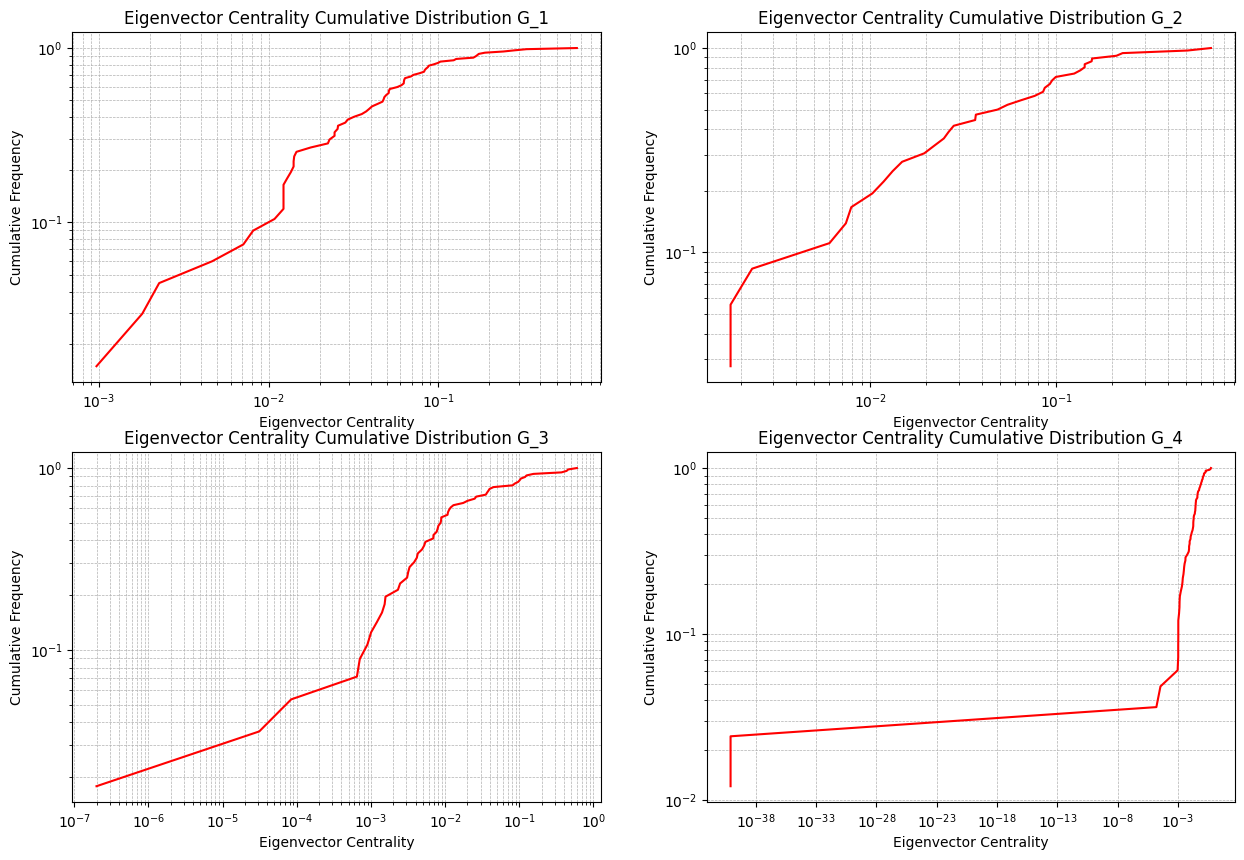

In [42]:
#cumulative

# in log plot should be a line

# from BOOK1 TO BOOK 4

values_1 = list(eig_centrality_1.values())
values_1.sort()
cumulative_frequencies_1 = np.cumsum(np.ones(len(values_1)) / len(values_1))

values_2 = list(eig_centrality_2.values())
values_2.sort()
cumulative_frequencies_2 = np.cumsum(np.ones(len(values_2)) / len(values_2))

values_3 = list(eig_centrality_3.values())
values_3.sort()
cumulative_frequencies_3 = np.cumsum(np.ones(len(values_3)) / len(values_3))

values_4 = list(eig_centrality_4.values())
values_4.sort()
cumulative_frequencies_4 = np.cumsum(np.ones(len(values_4)) / len(values_4))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_1, cumulative_frequencies_1, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_2, cumulative_frequencies_2, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_3, cumulative_frequencies_3, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_4, cumulative_frequencies_4, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# TO DO: FIT

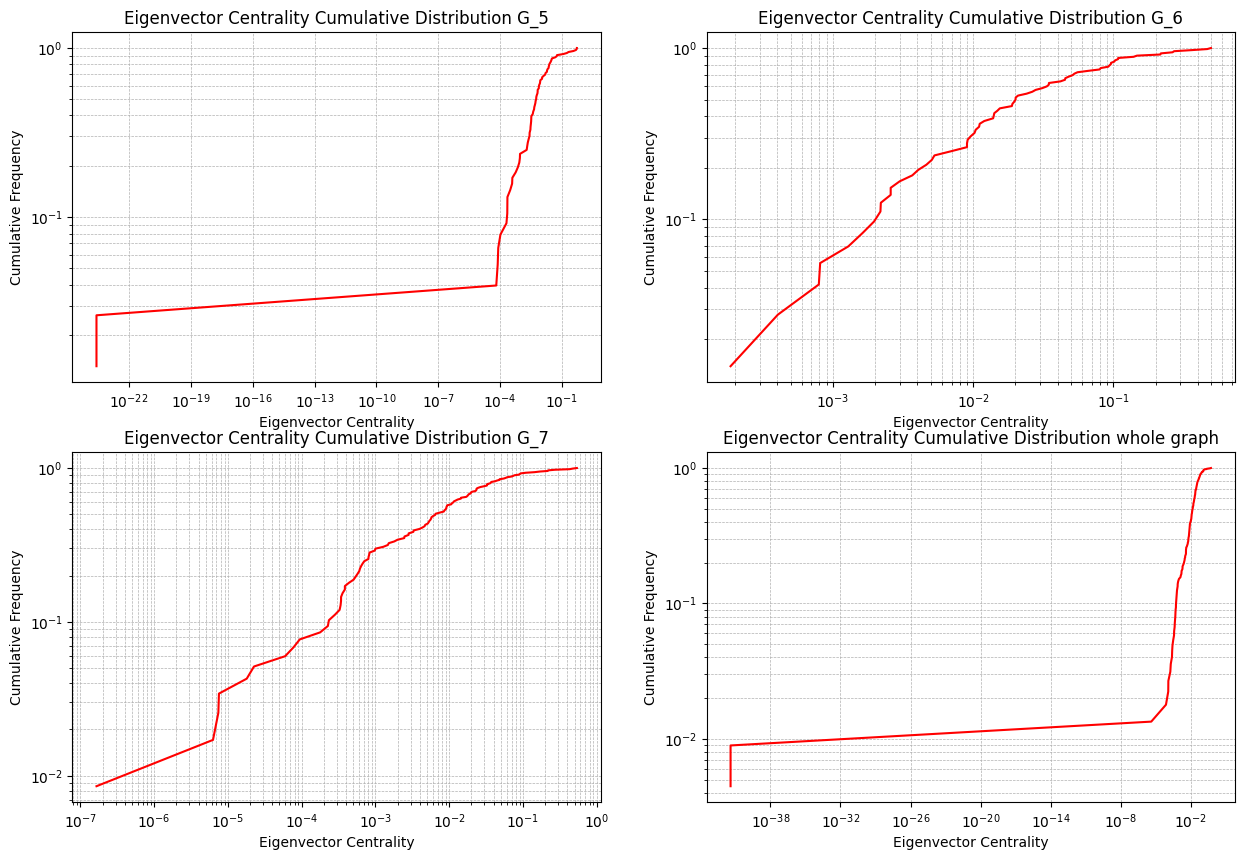

In [43]:
# from BOOK 5 TO BOOK 7

values_5 = list(eig_centrality_5.values())
values_5.sort()
cumulative_frequencies_5 = np.cumsum(np.ones(len(values_5)) / len(values_5))

values_6 = list(eig_centrality_6.values())
values_6.sort()
cumulative_frequencies_6 = np.cumsum(np.ones(len(values_6)) / len(values_6))

values_7 = list(eig_centrality_7.values())
values_7.sort()
cumulative_frequencies_7 = np.cumsum(np.ones(len(values_7)) / len(values_7))

values_all = list(eig_centrality_all.values())
values_all.sort()
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_5, cumulative_frequencies_5, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_6, cumulative_frequencies_6, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_7, cumulative_frequencies_7, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Eigenvector Centrality Cumulative Distribution whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


## Closeness centrality

In [44]:
closeness_1 = nx.closeness_centrality(G_1)
closeness_2 = nx.closeness_centrality(G_2)
closeness_3 = nx.closeness_centrality(G_3)
closeness_4 = nx.closeness_centrality(G_4)
closeness_5 = nx.closeness_centrality(G_5)
closeness_6 = nx.closeness_centrality(G_6)
closeness_7 = nx.closeness_centrality(G_7)
closeness_all = nx.closeness_centrality(G_all)

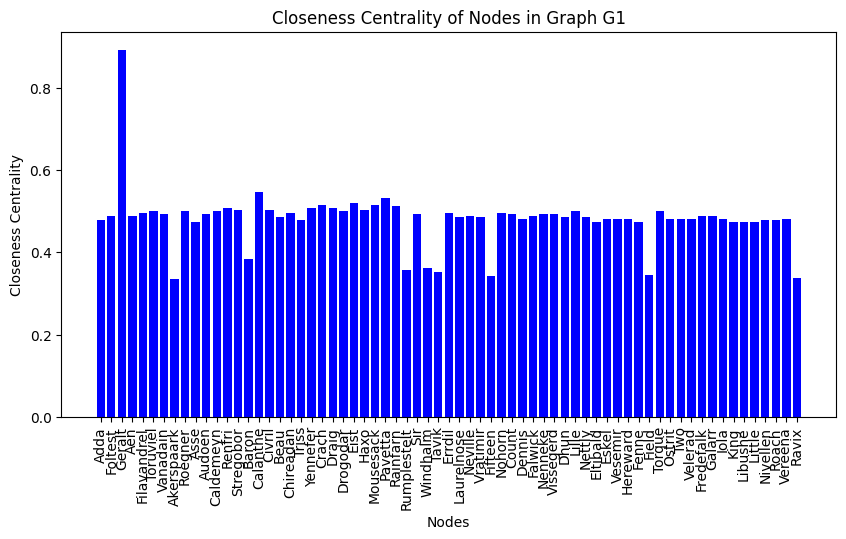

In [45]:
# BOOK 1
closeness_nodes = closeness_1.keys()
closeness_centralities = closeness_1.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [46]:
# # BOOK 2
# closeness_nodes = closeness_2.keys()
# closeness_centralities = closeness_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# closeness_nodes = closeness_3.keys()
# closeness_centralities = closeness_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 4
# closeness_nodes = closeness_4.keys()
# closeness_centralities = closeness_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 5
# closeness_nodes = closeness_5.keys()
# closeness_centralities = closeness_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 6
# closeness_nodes = closeness_6.keys()
# closeness_centralities = closeness_6.values()
# plt.figure(figsize=(13,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# closeness_nodes = closeness_7.keys()
# closeness_centralities = closeness_7.values()
# plt.figure(figsize=(15,5))
# plt.bar(closeness_nodes, closeness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Closeness Centrality')
# plt.title('Closeness Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Closeness centrality ***distribution***

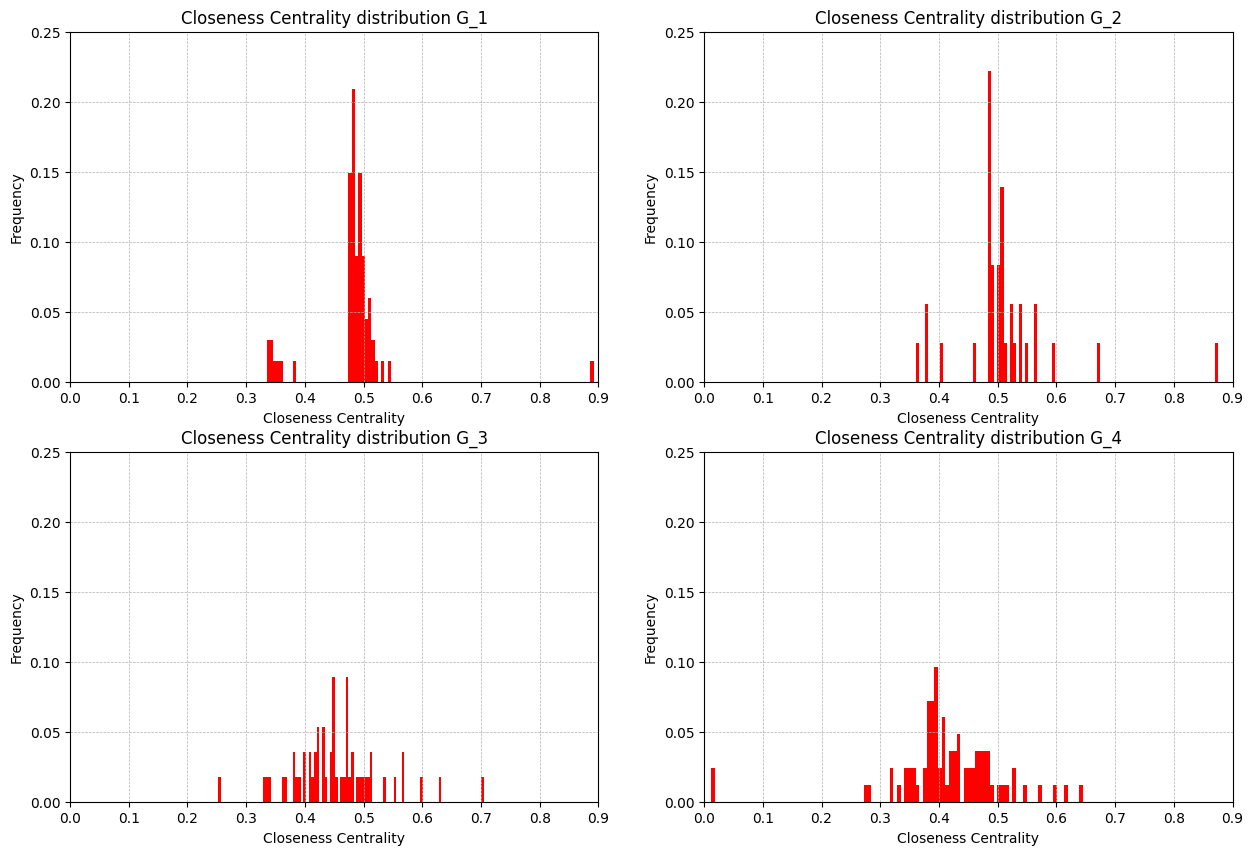

In [47]:
# from BOOK1 TO BOOK 4

values_1 = list(closeness_1.values())
values_2 = list(closeness_2.values())
values_3 = list(closeness_3.values())
values_4 = list(closeness_4.values())

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.hist(values_1, bins=100, color = 'r', weights=np.ones(len(values_1)) / len(values_1))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_1')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.hist(values_2, bins=100, color = 'r', weights=np.ones(len(values_2)) / len(values_2))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_2')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.hist(values_3, bins=100, color = 'r', weights=np.ones(len(values_3)) / len(values_3))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_3')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.hist(values_4, bins=100, color = 'r', weights=np.ones(len(values_4)) / len(values_4))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_4')
plt.xlim(0, 0.9)
plt.ylim(0, 0.25)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


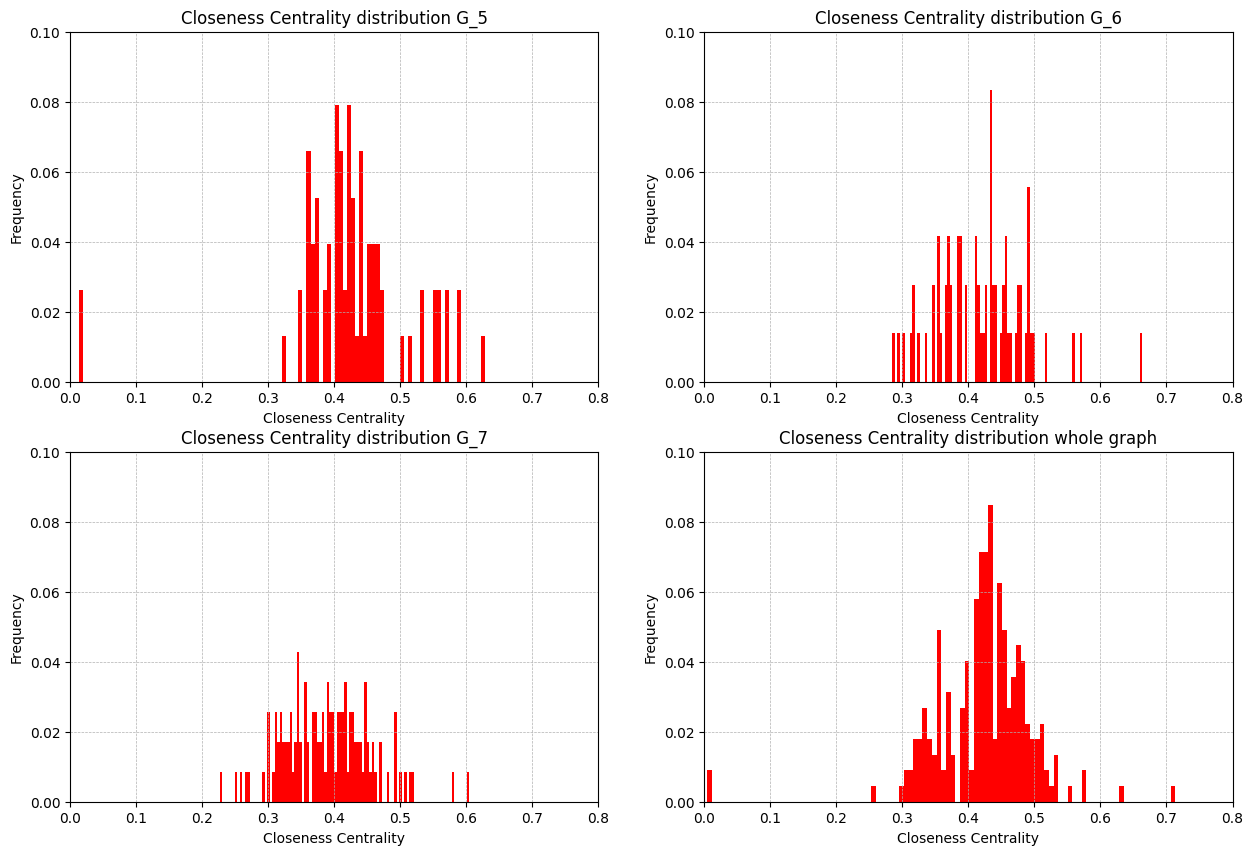

In [48]:
# from BOOK5
values_5 = list(closeness_5.values())
values_6 = list(closeness_6.values())
values_7 = list(closeness_7.values())
values_all = list(closeness_all.values())


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.hist(values_5, bins=100, color = 'r', weights=np.ones(len(values_5)) / len(values_5))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_5')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.hist(values_6, bins=100, color = 'r', weights=np.ones(len(values_6)) / len(values_6))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_6')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.hist(values_7, bins=100, color = 'r', weights=np.ones(len(values_7)) / len(values_7))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution G_7')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.hist(values_all, bins=100, color = 'r', weights=np.ones(len(values_all)) / len(values_all))
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality distribution whole graph')
plt.xlim(0, 0.8)
plt.ylim(0, 0.10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


### Cumulative Distribution for Closeness Centrality (only book 1)

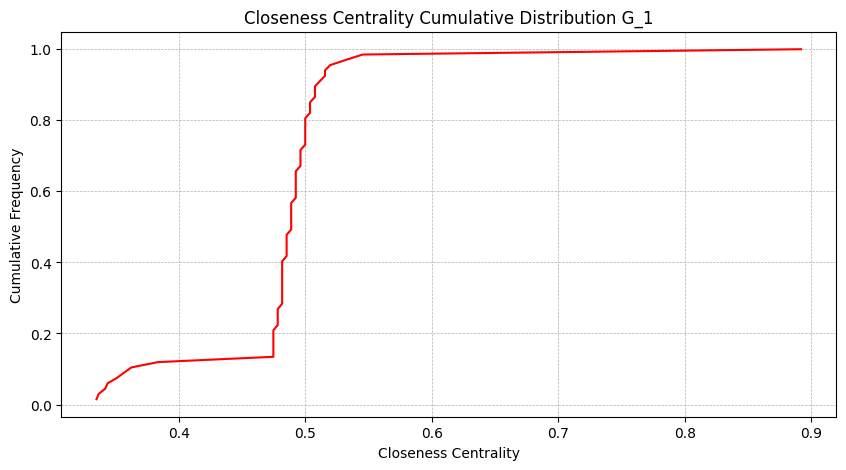

In [49]:
#cumulative for BOOK 1

values_1 = list(closeness_1.values())
values_1.sort()
cumulative_frequencies_1 = np.cumsum(np.ones(len(values_1)) / len(values_1))


plt.figure(figsize=(10,5))

plt.plot(values_1, cumulative_frequencies_1, color = 'r')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Closeness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

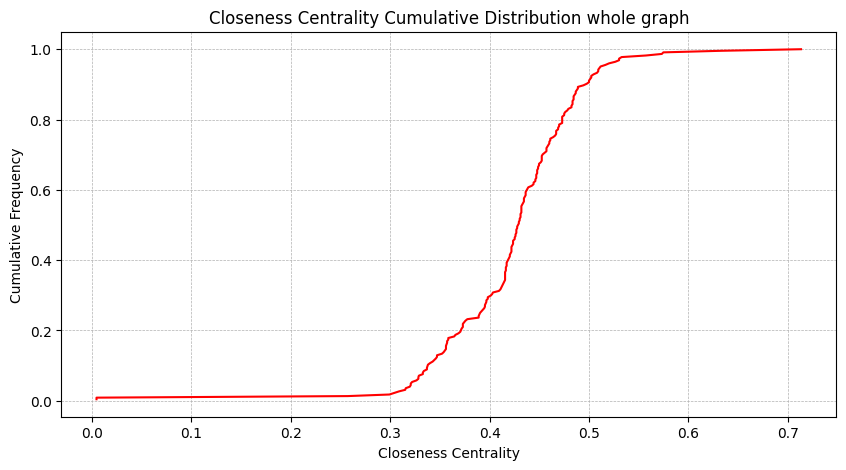

In [50]:
#cumulative for whole graph (all books)

values_all = list(closeness_all.values())
values_all.sort()
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))


plt.figure(figsize=(10,5))

plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Closeness Centrality Cumulative Distribution whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


## Betweenness centrality

In [51]:
betweenness_1 = nx.betweenness_centrality(G_1, normalized=True, weight='Weight')
betweenness_2 = nx.betweenness_centrality(G_2, normalized=True, weight='Weight')
betweenness_3 = nx.betweenness_centrality(G_3, normalized=True, weight='Weight')
betweenness_4 = nx.betweenness_centrality(G_4, normalized=True, weight='Weight')
betweenness_5 = nx.betweenness_centrality(G_5, normalized=True, weight='Weight')
betweenness_6 = nx.betweenness_centrality(G_6, normalized=True, weight='Weight')
betweenness_7 = nx.betweenness_centrality(G_7, normalized=True, weight='Weight')
betweenness_all = nx.betweenness_centrality(G_all, normalized=True, weight = 'Weight')


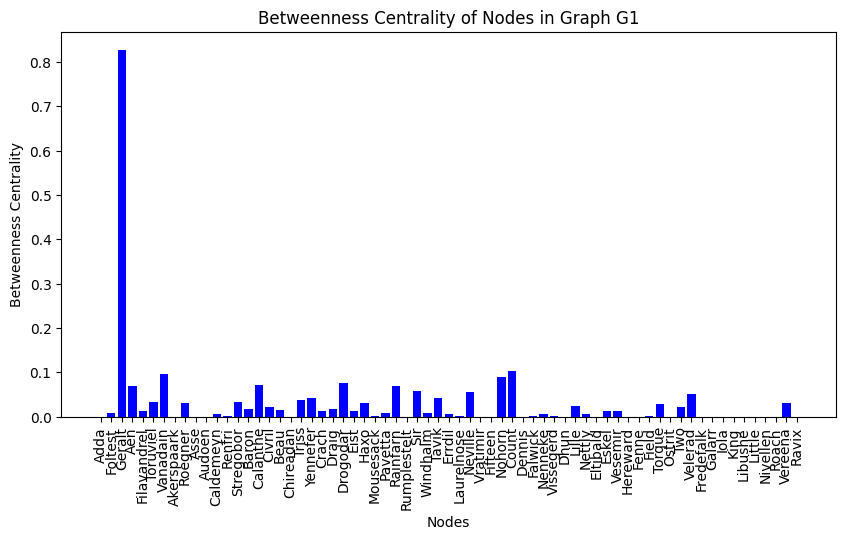

In [52]:
# BOOK 1
betweenness_nodes = betweenness_1.keys()
betweenness_centralities = betweenness_1.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()



# BOOK 2
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_2.keys()
# betweenness_centralities = betweenness_2.values()

# plt.figure(figsize=(10,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 3
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_3.keys()
# betweenness_centralities = betweenness_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 4
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_4.keys()
# betweenness_centralities = betweenness_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()



# BOOK 5
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_5.keys()
# betweenness_centralities = betweenness_5.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 6
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_6.keys()
# betweenness_centralities = betweenness_6.values()

# plt.figure(figsize=(13,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# betweenness_nodes = betweenness_7.keys()
# betweenness_centralities = betweenness_7.values()

# plt.figure(figsize=(15,5))
# plt.bar(betweenness_nodes, betweenness_centralities, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

In [53]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes (with more edges)
threshold = 0.15 # we have to choose a value

high_betweenness_nodes_1 = [node for node, bet in betweenness_1.items() if bet > threshold]
high_betweenness_nodes_2 = [node for node, bet in betweenness_2.items() if bet > threshold]
high_betweenness_nodes_3 = [node for node, bet in betweenness_3.items() if bet > threshold]
high_betweenness_nodes_4 = [node for node, bet in betweenness_4.items() if bet > threshold]
high_betweenness_nodes_5 = [node for node, bet in betweenness_5.items() if bet > threshold]
high_betweenness_nodes_6 = [node for node, bet in betweenness_6.items() if bet > threshold]
high_betweenness_nodes_7 = [node for node, bet in betweenness_7.items() if bet > threshold]
high_betweenness_nodes_all = [node for node, bet in betweenness_all.items() if bet > threshold]

print("Graph 1 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_1)
print("Graph 2 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_2)
print("Graph 3 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_3)
print("Graph 4 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_4)
print("Graph 5 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_5)
print("Graph 6 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_6)
print("Graph 7 - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_7)
print("Whole Graph - Nodes with betweenness centrality above ", threshold, ": ", high_betweenness_nodes_all)


Graph 1 - Nodes with betweenness centrality above  0.15 :  ['Geralt']
Graph 2 - Nodes with betweenness centrality above  0.15 :  ['Geralt', 'Dandelion', 'Yennefer', 'Ciri', 'Yurga']
Graph 3 - Nodes with betweenness centrality above  0.15 :  ['Ciri', 'Yennefer', 'Geralt', 'Foltest', 'Rience']
Graph 4 - Nodes with betweenness centrality above  0.15 :  ['Ciri', 'Emhyr']
Graph 5 - Nodes with betweenness centrality above  0.15 :  ['Geralt']
Graph 6 - Nodes with betweenness centrality above  0.15 :  ['Ciri', 'Geralt', 'Emhyr']
Graph 7 - Nodes with betweenness centrality above  0.15 :  []
Whole Graph - Nodes with betweenness centrality above  0.15 :  ['Geralt']


#### Betweenness Centrality ***distribution***



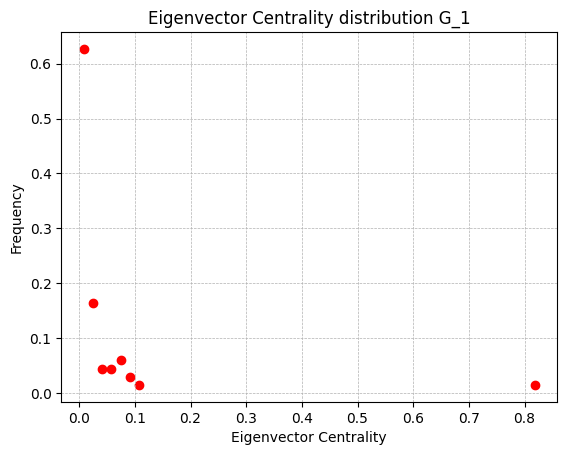

In [54]:
# SCATTER

# BOOK1
values_1 = list(betweenness_1.values())
freq, bins = np.histogram(values_1, bins=50)

bins = (bins[:-1] + bins[1:]) / 2  # x = center value of each bin
freq = [i/df_nodes1.shape[0] for i in freq] # find the frequency by divinding freq list by the tot nodes
freq = np.array(freq, dtype='float32')  # convert freq from list to numpy array

#Filter out zero values (they are values it added, not ours)
non_zero_indices = np.where(freq > 0)
bins = bins[non_zero_indices]
freq = freq[non_zero_indices]

plt.scatter(bins, freq, color='r')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

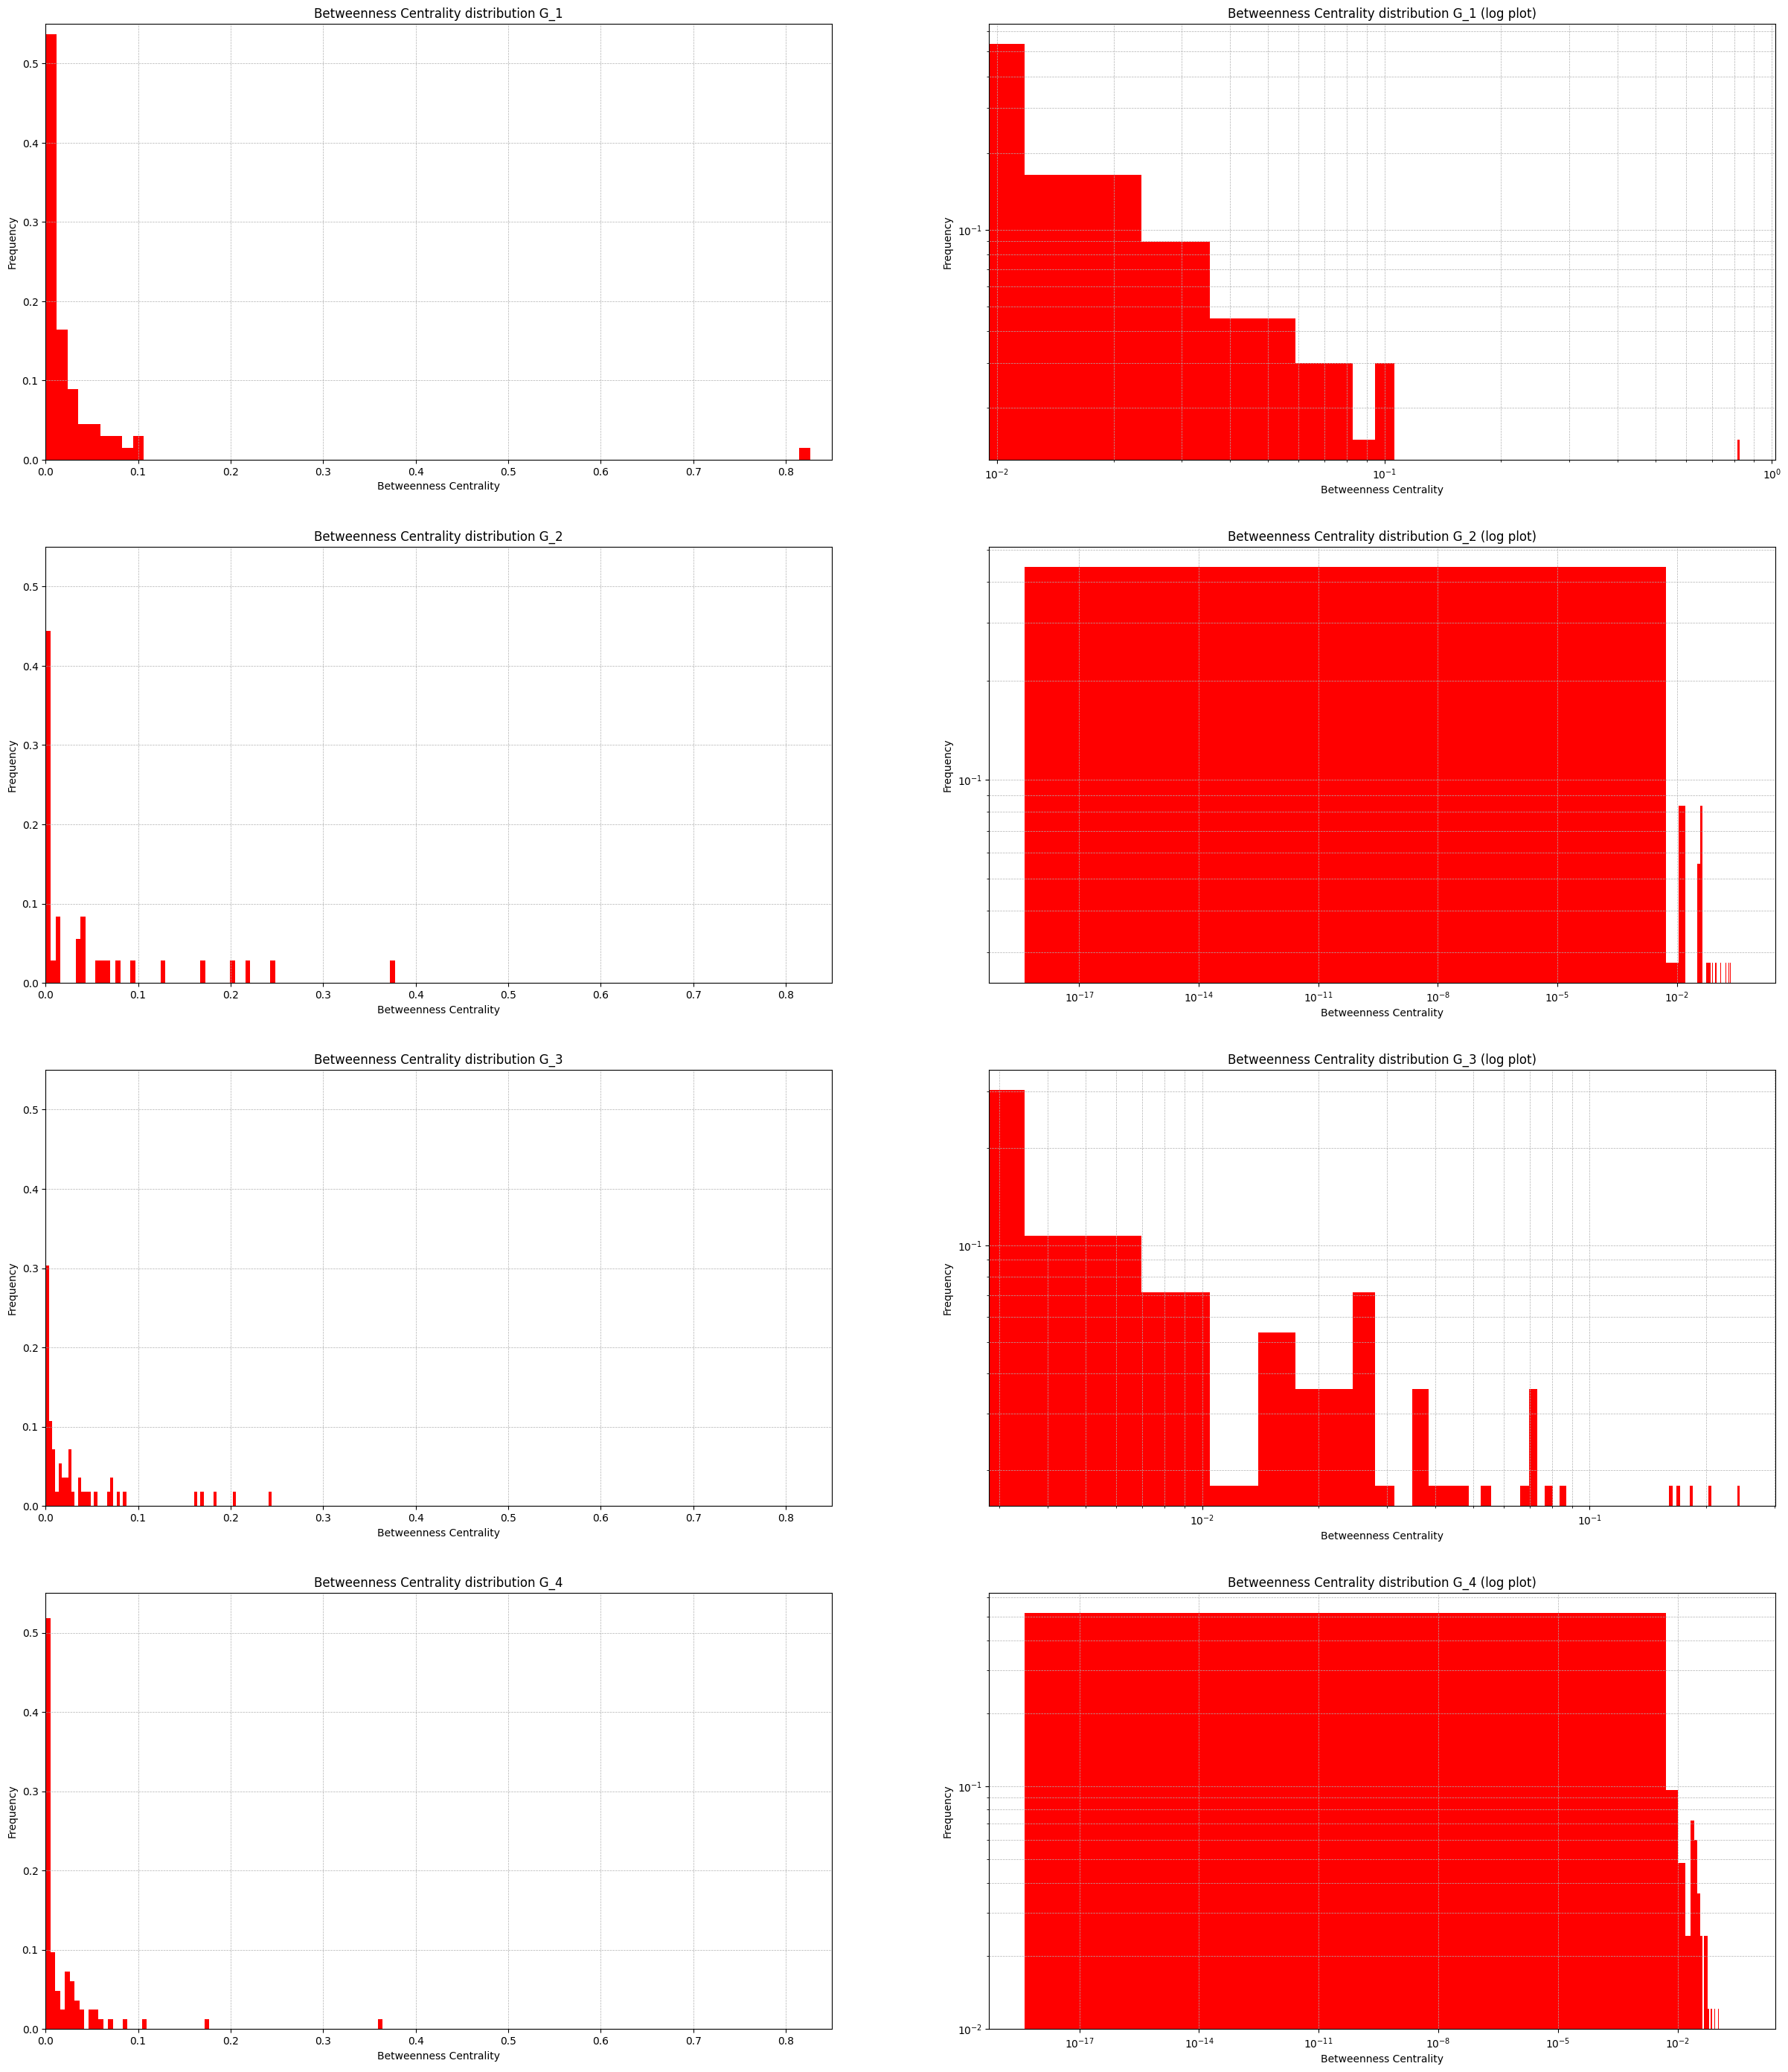

In [55]:
# from BOOK1 TO BOOK 4  HISTOGRAMS

values_1 = list(betweenness_1.values())
values_2 = list(betweenness_2.values())
values_3 = list(betweenness_3.values())
values_4 = list(betweenness_4.values())

plt.figure(figsize=(30, 35))

plt.subplot(4, 2, 1)
plt.hist(values_1, bins=70, color = 'r', weights=np.ones(len(values_1)) / len(values_1))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_1')
plt.xlim(0, 0.85)
plt.ylim(0, 0.55)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 2)
plt.hist(values_1, bins=70, color = 'r', weights=np.ones(len(values_1)) / len(values_1), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_1 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK2
plt.subplot(4, 2, 3)
plt.hist(values_2, bins=70, color = 'r', weights=np.ones(len(values_2)) / len(values_2))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_2')
plt.xlim(0, 0.85)
plt.ylim(0, 0.55)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 4)
plt.hist(values_2, bins=70, color = 'r', weights=np.ones(len(values_2)) / len(values_2), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_2 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK3
plt.subplot(4, 2, 5)
plt.hist(values_3, bins=70, color = 'r', weights=np.ones(len(values_3)) / len(values_3))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_3')
plt.xlim(0, 0.85)
plt.ylim(0, 0.55)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 6)
plt.hist(values_3, bins=70, color = 'r', weights=np.ones(len(values_3)) / len(values_3), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_3 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK4
plt.subplot(4, 2, 7)
plt.hist(values_4, bins=70, color = 'r', weights=np.ones(len(values_4)) / len(values_4))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_4')
plt.xlim(0, 0.85)
plt.ylim(0, 0.55)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 8)
plt.hist(values_4, bins=70, color = 'r', weights=np.ones(len(values_4)) / len(values_4), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_4 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


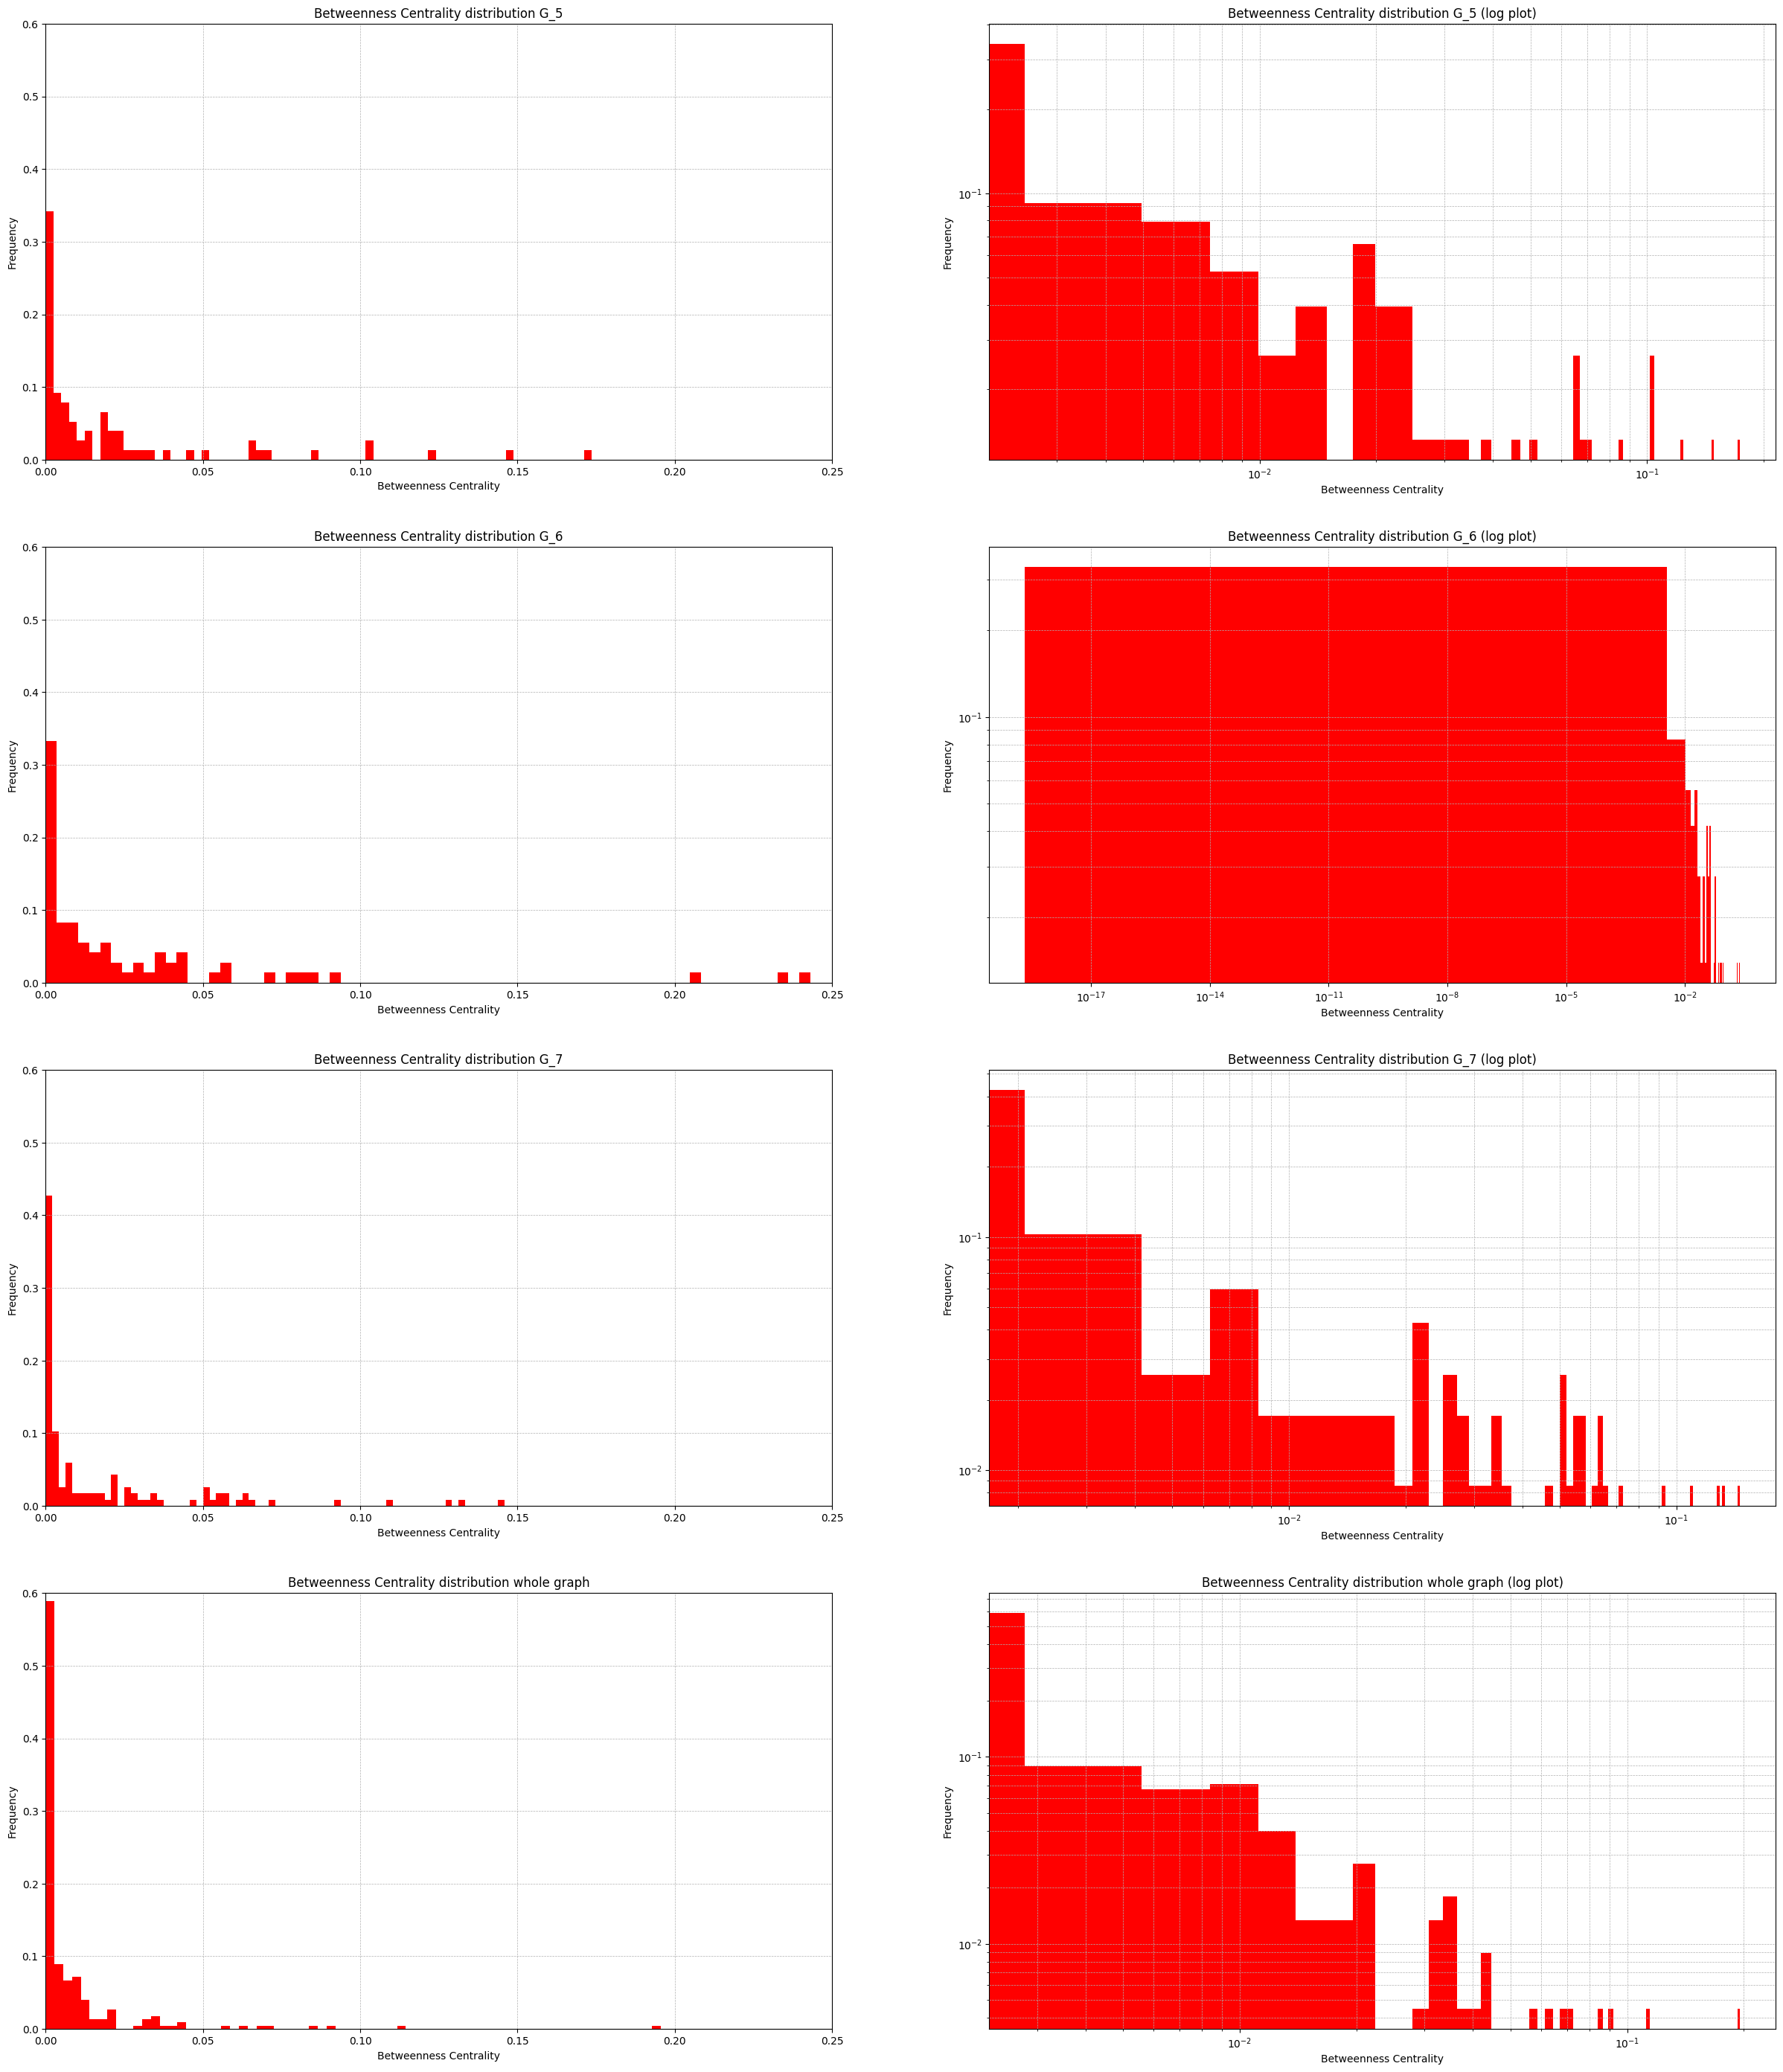

In [56]:
# from BOOK 5 to BOOK 7

values_5 = list(betweenness_5.values())
values_6 = list(betweenness_6.values())
values_7 = list(betweenness_7.values())
values_all = list(betweenness_all.values())


plt.figure(figsize=(30,35))

plt.subplot(4, 2, 1)
plt.hist(values_5, bins=70, color = 'r', weights=np.ones(len(values_5)) / len(values_5))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_5')
plt.xlim(0, 0.25)
plt.ylim(0, 0.6)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 2)
plt.hist(values_5, bins=70, color = 'r', weights=np.ones(len(values_5)) / len(values_5), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_5 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# BOOK6
plt.subplot(4, 2, 3)
plt.hist(values_6, bins=70, color = 'r', weights=np.ones(len(values_6)) / len(values_6))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_6')
plt.xlim(0, 0.25)
plt.ylim(0, 0.6)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 4)
plt.hist(values_6, bins=70, color = 'r', weights=np.ones(len(values_6)) / len(values_6), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_6 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#BOOK7
plt.subplot(4, 2, 5)
plt.hist(values_7, bins=70, color = 'r', weights=np.ones(len(values_7)) / len(values_7))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_7')
plt.xlim(0, 0.25)
plt.ylim(0, 0.6)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 6)
plt.hist(values_7, bins=70, color = 'r', weights=np.ones(len(values_7)) / len(values_7), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution G_7 (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

#WHOLE GRAPH
plt.subplot(4, 2, 7)
plt.hist(values_all, bins=70, color = 'r', weights=np.ones(len(values_all)) / len(values_all))
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution whole graph')
plt.xlim(0, 0.25)
plt.ylim(0, 0.6)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(4, 2, 8)
plt.hist(values_all, bins=70, color = 'r', weights=np.ones(len(values_all)) / len(values_all), log = True)
plt.xscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality distribution whole graph (log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


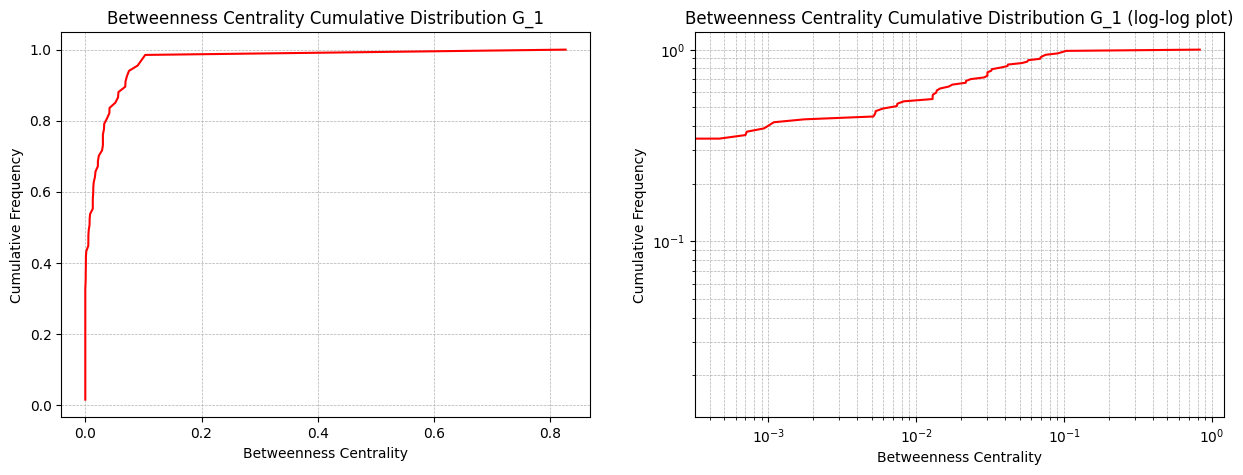

In [57]:
# cumulative

# Extract the values and compute the frequencies
values = list(betweenness_1.values())
values.sort()

# Compute the cumulative frequencies
cumulative_frequencies = np.cumsum(np.ones(len(values)) / len(values))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1, 2, 2)
#log plot
plt.plot(values, cumulative_frequencies, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1 (log-log plot)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


### Cumulative Distribution for Betweenness Centrality

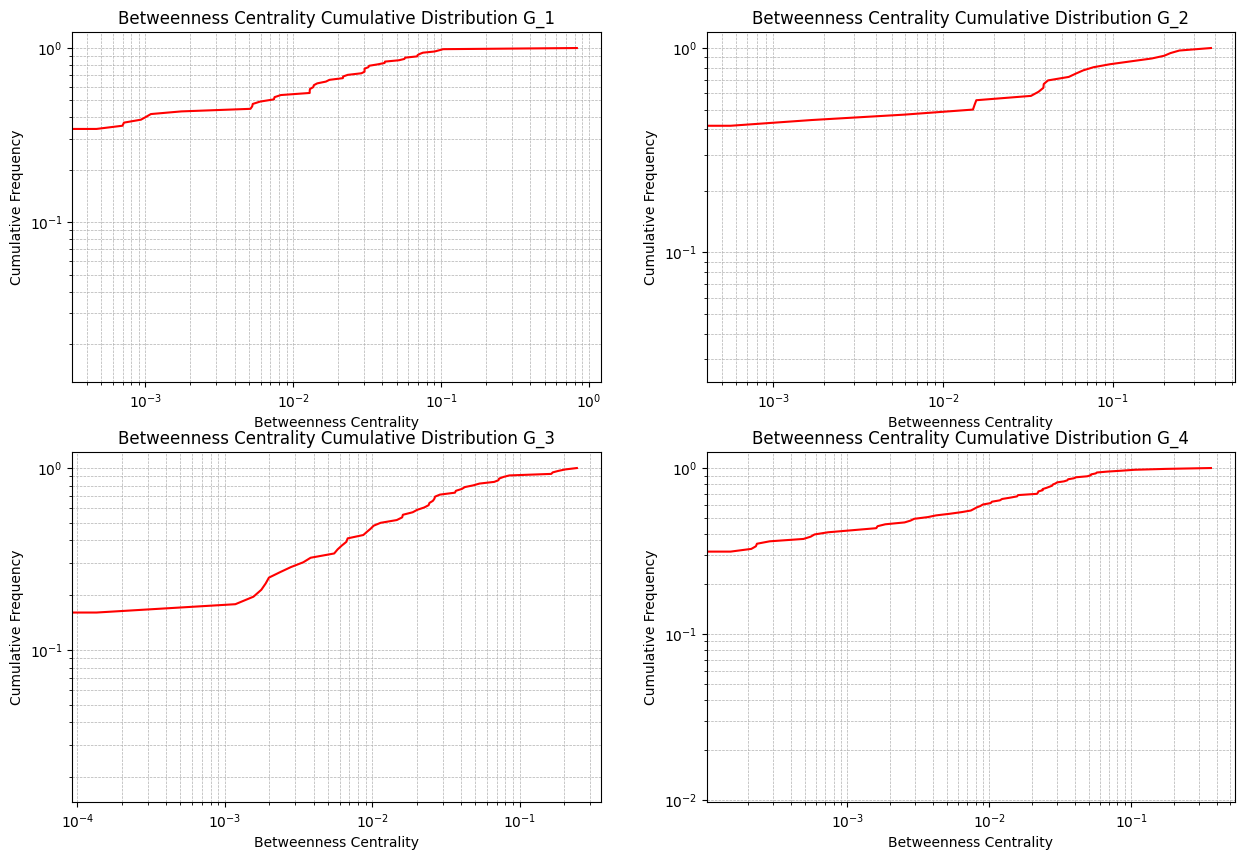

In [58]:
#cumulative

# in log plot should be a line

# from BOOK1 TO BOOK 4

values_1 = list(betweenness_1.values())
values_1.sort()
cumulative_frequencies_1 = np.cumsum(np.ones(len(values_1)) / len(values_1))

values_2 = list(betweenness_2.values())
values_2.sort()
cumulative_frequencies_2 = np.cumsum(np.ones(len(values_2)) / len(values_2))

values_3 = list(betweenness_3.values())
values_3.sort()
cumulative_frequencies_3 = np.cumsum(np.ones(len(values_3)) / len(values_3))

values_4 = list(betweenness_4.values())
values_4.sort()
cumulative_frequencies_4 = np.cumsum(np.ones(len(values_4)) / len(values_4))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_1, cumulative_frequencies_1, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_2, cumulative_frequencies_2, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_3, cumulative_frequencies_3, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_4, cumulative_frequencies_4, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

# TO DO: FIT

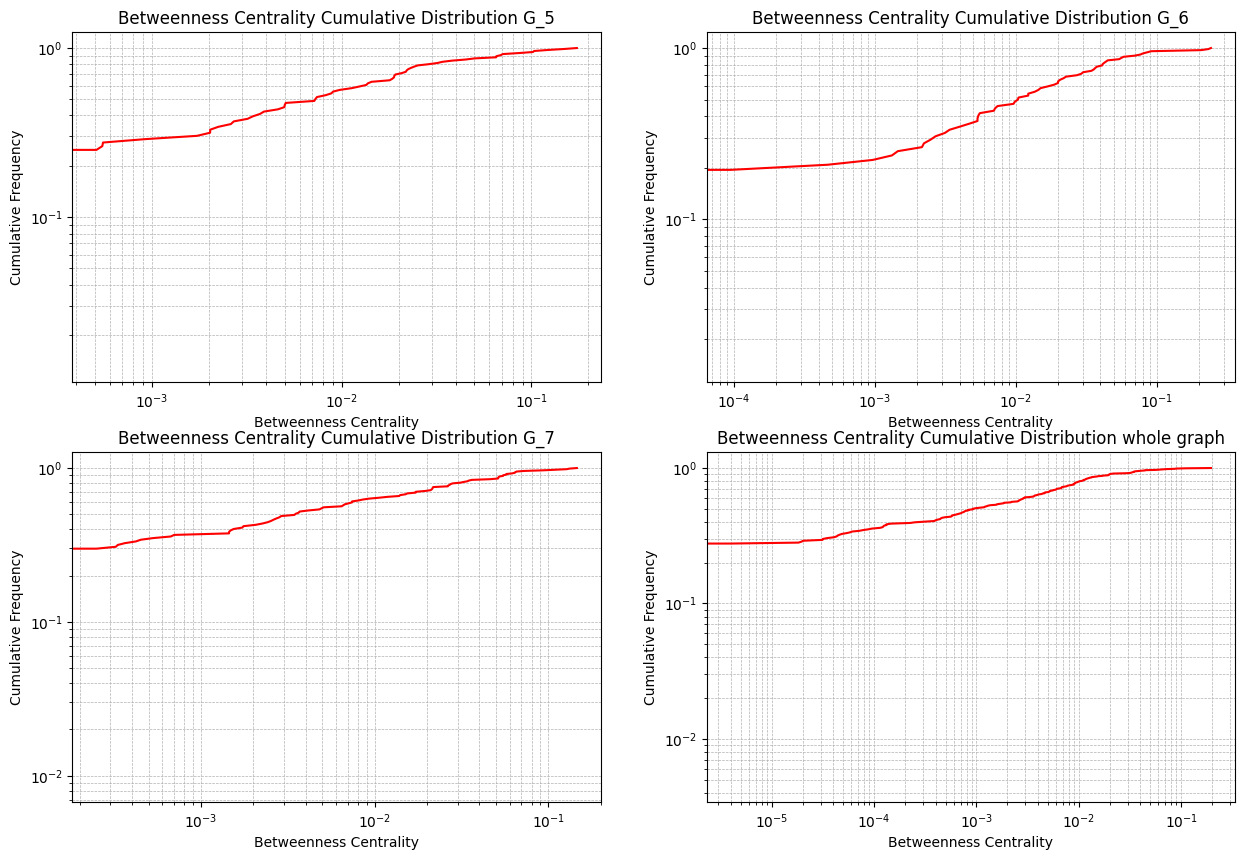

In [59]:
# from BOOK 5 TO BOOK 7

values_5 = list(betweenness_5.values())
values_5.sort()
cumulative_frequencies_5 = np.cumsum(np.ones(len(values_5)) / len(values_5))

values_6 = list(betweenness_6.values())
values_6.sort()
cumulative_frequencies_6 = np.cumsum(np.ones(len(values_6)) / len(values_6))

values_7 = list(betweenness_7.values())
values_7.sort()
cumulative_frequencies_7 = np.cumsum(np.ones(len(values_7)) / len(values_7))

values_all = list(betweenness_all.values())
values_all.sort()
cumulative_frequencies_all = np.cumsum(np.ones(len(values_all)) / len(values_all))


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(values_5, cumulative_frequencies_5, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 2)
plt.plot(values_6, cumulative_frequencies_6, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 3)
plt.plot(values_7, cumulative_frequencies_7, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.subplot(2, 2, 4)
plt.plot(values_all, cumulative_frequencies_all, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Cumulative Frequency')
plt.title('Betweenness Centrality Cumulative Distribution whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


## Cliques

In [60]:
# BOOK 1
cliques = list(nx.find_cliques(G_1))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Rumplestelt', 'Sir', 'Calanthe']
Clique 2: ['Geralt', 'Aen', 'Toruviel', 'Vanadain']
Clique 3: ['Geralt', 'Aen', 'Toruviel', 'Filavandrel']
Clique 4: ['Geralt', 'Nettly', 'Lille', 'Dhun']
Clique 5: ['Geralt', 'Fenne']
Clique 6: ['Geralt', 'Vanadain', 'Galarr', 'Torque', 'Toruviel']
Clique 7: ['Geralt', 'King']
Clique 8: ['Geralt', 'Two', 'Foltest']
Clique 9: ['Geralt', 'Two', 'Yennefer']
Clique 10: ['Geralt', 'Dennis', 'Falwick', 'Count']
Clique 11: ['Geralt', 'Vereena', 'Roach']
Clique 12: ['Geralt', 'Vereena', 'Nivellen']
Clique 13: ['Geralt', 'Nenneke', 'Yennefer', 'Iola']
Clique 14: ['Geralt', 'Nenneke', 'Falwick', 'Count']
Clique 15: ['Geralt', 'Nenneke', 'Falwick', 'Hereward']
Clique 16: ['Geralt', 'Little']
Clique 17: ['Geralt', 'Adda', 'Foltest']
Clique 18: ['Geralt', 'Calanthe', 'Drogodar', 'Eist', 'Crach']
Clique 19: ['Geralt', 'Calanthe', 'Pavetta', 'Mousesack', 'Haxo']
Clique 20: ['Geralt', 'Calanthe', 'Pavetta', 'Mousesack', 'Crach', 'Eist', 'Draig', 'Rainfarn'

In [61]:
# BOOK 2
cliques = list(nx.find_cliques(G_2))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Geralt', 'Istredd', 'Yennefer']
Clique 2: ['Geralt', 'Istredd', 'Herbolth']
Clique 3: ['Geralt', 'Aen', 'Braenn']
Clique 4: ['Geralt', 'Herbolth', 'Seven']
Clique 5: ['Geralt', 'Yurga', 'Mousesack', 'Ciri']
Clique 6: ['Geralt', 'Yurga', 'Yennefer']
Clique 7: ['Geralt', 'Yurga', 'Triss']
Clique 8: ['Geralt', 'Yurga', 'King']
Clique 9: ['Geralt', 'Yurga', 'Visenna']
Clique 10: ['Geralt', 'Yurga', 'Roach']
Clique 11: ['Geralt', 'Mousesack', 'Ciri', 'Braenn']
Clique 12: ['Geralt', 'Mousesack', 'Ciri', 'Calanthe']
Clique 13: ['Geralt', 'Eithné', 'Yennefer']
Clique 14: ['Geralt', 'Eithné', 'Freixenet', 'Ciri', 'Braenn']
Clique 15: ['Geralt', 'Eithné', 'Freixenet', 'Venzlav']
Clique 16: ['Geralt', 'Eithné', 'Calanthe', 'Ciri']
Clique 17: ['Geralt', 'Pavetta', 'Ciri', 'Calanthe']
Clique 18: ['Geralt', 'Dandelion', 'Duke', 'Zelest', 'Agloval']
Clique 19: ['Geralt', 'Dandelion', 'Essi', 'Yennefer']
Clique 20: ['Geralt', 'Dandelion', 'Essi', 'Little', 'Agloval']
Clique 21: ['Geralt', 

In [62]:
# BOOK 3
cliques = list(nx.find_cliques(G_3))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Aen', 'Yennefer', 'Vilgefortz', 'Tissaia']
Clique 2: ['Windhalm', 'Rience']
Clique 3: ['Vilgefortz', 'Yennefer', 'Lydia', 'Artaud', 'Tissaia']
Clique 4: ['Vilgefortz', 'Vissegerd', 'Emhyr']
Clique 5: ['Sir', 'Rience', 'Dandelion']
Clique 6: ['Emhyr', 'Foltest', 'Meve', 'Vissegerd', 'Henselt']
Clique 7: ['Emhyr', 'Foltest', 'Meve', 'Vissegerd', 'Calanthe']
Clique 8: ['Emhyr', 'Foltest', 'Crach', 'Henselt']
Clique 9: ['Emhyr', 'Foltest', 'Crach', 'Calanthe']
Clique 10: ['Emhyr', 'Ithlinne']
Clique 11: ['Ethain', 'Henselt', 'Crach']
Clique 12: ['Little', 'Dandelion', 'Rience', 'Shani']
Clique 13: ['Artaud', 'Two', 'Tissaia', 'Lydia']
Clique 14: ['Donimir', 'Dandelion', 'Sheldon']
Clique 15: ['Donimir', 'Dandelion', 'Two']
Clique 16: ['Essi', 'Yennefer', 'Blue', 'Dandelion']
Clique 17: ['Foltest', 'Everett', 'Geralt']
Clique 18: ['Foltest', 'Venzlav']
Clique 19: ['Foltest', 'Henselt', 'King', 'Meve']
Clique 20: ['Foltest', 'Calanthe', 'Rience', 'Vissegerd']
Clique 21: ['Foltest

In [63]:
# BOOK 4
cliques = list(nx.find_cliques(G_4))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Sigismund', 'Voymir']
Clique 2: ['Carduin', 'Gar', 'Marti', 'Vilgefortz']
Clique 3: ['Carduin', 'Gar', 'Marti', 'Philippa']
Clique 4: ['Carduin', 'Gar', 'Tissaia', 'Vilgefortz']
Clique 5: ['Carduin', 'Gar', 'Tissaia', 'Philippa']
Clique 6: ['Carduin', 'Vilgefortz', 'Dorregaray', 'Marti']
Clique 7: ['Carduin', 'Vilgefortz', 'Esterad']
Clique 8: ['Carduin', 'Sabrina', 'Philippa', 'Dorregaray', 'Marti']
Clique 9: ['Carduin', 'Sabrina', 'Philippa', 'Tissaia']
Clique 10: ['Carduin', 'Sabrina', 'Esterad']
Clique 11: ['Demavend', 'Emhyr', 'Meve', 'Aplegatt']
Clique 12: ['Demavend', 'Emhyr', 'Hereward']
Clique 13: ['Demavend', 'Emhyr', 'Foltest', 'Philippa', 'Sabrina', 'Henselt']
Clique 14: ['Demavend', 'Emhyr', 'Foltest', 'Philippa', 'King']
Clique 15: ['Demavend', 'Emhyr', 'Foltest', 'Aplegatt', 'King']
Clique 16: ['Demavend', 'Emhyr', 'Tissaia', 'Philippa', 'Sabrina']
Clique 17: ['Demavend', 'Emhyr', 'Tissaia', 'Philippa', 'King']
Clique 18: ['Demavend', 'Emhyr', 'Dandelion']
Cl

In [64]:
# BOOK 5
cliques = list(nx.find_cliques(G_5))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Mistle', 'Falka', 'Ciri', 'Kayleigh']
Clique 2: ['Mistle', 'Falka', 'Two']
Clique 3: ['Mistle', 'Cahir', 'Ciri']
Clique 4: ['Mistle', 'Cahir', 'Two']
Clique 5: ['Daniel', 'Foltest', 'Vissegerd', 'Count']
Clique 6: ['Daniel', 'Dandelion', 'Vissegerd', 'Count']
Clique 7: ['Daniel', 'Dandelion', 'Emhyr', 'Calanthe']
Clique 8: ['Codringher', 'Milva']
Clique 9: ['Vilgefortz', 'Francesca', 'Ida', 'Yennefer', 'Ciri', 'Margarita', 'Sabrina']
Clique 10: ['Vilgefortz', 'Francesca', 'Ida', 'Yennefer', 'Tissaia']
Clique 11: ['Vilgefortz', 'Rience', 'Ciri']
Clique 12: ['Vilgefortz', 'Rience', 'Demavend']
Clique 13: ['Vilgefortz', 'Sir', 'Demavend']
Clique 14: ['Henselt', 'Francesca', 'Ida']
Clique 15: ['Morteisen', 'Vreemde']
Clique 16: ['King', 'Francesca', 'Assire', 'Triss']
Clique 17: ['King', 'Zoltan', 'Brouver']
Clique 18: ['King', 'Zoltan', 'Percival', 'Dandelion']
Clique 19: ['King', 'Assire', 'Albrich']
Clique 20: ['Riordain', 'Dandelion']
Clique 21: ['Ithlinne', 'Francesca', 'M

In [65]:
# BOOK 6
cliques = list(nx.find_cliques(G_6))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Joanna', 'Stefan']
Clique 2: ['Joanna', 'Falka']
Clique 3: ['Milo', 'Nenneke', 'Iola']
Clique 4: ['Codringher', 'Vilgefortz', 'Geralt']
Clique 5: ['Henselt', 'Foltest', 'Demavend', 'Emhyr', 'King']
Clique 6: ['King', 'Radovid']
Clique 7: ['King', 'Emhyr', 'Esterad', 'Foltest']
Clique 8: ['King', 'Emhyr', 'Esterad', 'Zuleyka', 'Lebioda']
Clique 9: ['King', 'Emhyr', 'Geralt']
Clique 10: ['King', 'Baron', 'Geralt']
Clique 11: ['King', 'Blue', 'Esterad']
Clique 12: ['King', 'Philippa', 'Zuleyka']
Clique 13: ['Two', 'Jan']
Clique 14: ['Two', 'Geralt', 'Julia', 'Baron']
Clique 15: ['Two', 'Geralt', 'Yennefer', 'Crach']
Clique 16: ['Two', 'Geralt', 'Cahir']
Clique 17: ['Two', 'Sir']
Clique 18: ['Sir', 'Vilgefortz', 'Ithlinne']
Clique 19: ['Carthia', 'Assire', 'Vattier']
Clique 20: ['Ciri', 'Radovid', 'Hjalmar', 'Calanthe']
Clique 21: ['Ciri', 'Kelpie', 'Baron', 'Asse', 'Vysogota']
Clique 22: ['Ciri', 'Kelpie', 'Iola']
Clique 23: ['Ciri', 'Nenneke', 'Jarre', 'Triss', 'Iola']
Clique

In [66]:
# BOOK 7
cliques = list(nx.find_cliques(G_7))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Sigismund', 'Philippa']
Clique 2: ['Milo', 'Iola', 'Marti']
Clique 3: ['Mistle', 'Dandelion']
Clique 4: ['Sievers', 'Field', 'Menno']
Clique 5: ['Sievers', 'Seven']
Clique 6: ['Daniel', 'Count', 'Marti']
Clique 7: ['Fabio', 'Yennefer']
Clique 8: ['Aillil', 'Cahir']
Clique 9: ['Radovid', 'Demavend', 'Philippa']
Clique 10: ['Radovid', 'Demavend', 'Cyrus']
Clique 11: ['Adam', 'Bronibor', 'Jarre']
Clique 12: ['Adam', 'Bronibor', 'Julia', 'Foltest']
Clique 13: ['Adam', 'Bronibor', 'Barclay']
Clique 14: ['Henselt', 'King', 'Foltest', 'Demavend', 'Shilard']
Clique 15: ['Henselt', 'King', 'Foltest', 'Demavend', 'Meve']
Clique 16: ['Elan', 'Seven']
Clique 17: ['Aubry', 'Foltest', 'Julia']
Clique 18: ['Aubry', 'Barclay']
Clique 19: ['Riordain', 'Isengrim']
Clique 20: ['Sir', 'Arthur', 'Merlin']
Clique 21: ['Sir', 'Seven', 'Milva']
Clique 22: ['Sir', 'Geralt', 'Jarre', 'Anna']
Clique 23: ['Sir', 'Geralt', 'Reynart', 'Dandelion', 'Julia', 'Anna']
Clique 24: ['Sir', 'Geralt', 'Reynart',

## K core

In [67]:
# Compute the k-core of the graph
k = 3 # replace with your desired k value

k_core_1 = nx.k_core(G_1, k)
k_core_2 = nx.k_core(G_2, k)
k_core_3 = nx.k_core(G_3, k)
k_core_4 = nx.k_core(G_4, k)
k_core_5 = nx.k_core(G_5, k)
k_core_6 = nx.k_core(G_6, k)
k_core_7 = nx.k_core(G_7, k)

# Print the nodes in the k-core
print(f"The nodes in the {k}-core are: {k_core_1.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_2.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_3.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_4.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_5.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_6.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_7.nodes()}")


The nodes in the 3-core are: ['Foltest', 'Geralt', 'Aen', 'Filavandrel', 'Toruviel', 'Vanadain', 'Roegner', 'Audoen', 'Caldemeyn', 'Renfri', 'Stregobor', 'Baron', 'Calanthe', 'Civril', 'Beau', 'Chireadan', 'Yennefer', 'Crach', 'Draig', 'Drogodar', 'Eist', 'Haxo', 'Mousesack', 'Pavetta', 'Rainfarn', 'Windhalm', 'Tavik', 'Errdil', 'Laurelnose', 'Neville', 'Vratimir', 'Fifteen', 'Nohorn', 'Count', 'Dennis', 'Falwick', 'Nenneke', 'Vissegerd', 'Dhun', 'Lille', 'Nettly', 'Eskel', 'Vesemir', 'Hereward', 'Field', 'Torque', 'Ostrit', 'Two', 'Velerad', 'Fredefalk', 'Galarr', 'Iola']
The nodes in the 3-core are: ['Braenn', 'Geralt', 'Agloval', 'Dandelion', 'Duke', 'Essi', 'Little', 'Zelest', 'Istredd', 'Yennefer', 'Ciri', 'Eithné', 'Freixenet', 'Mousesack', 'Sir', 'Sword', 'Calanthe', 'Pavetta', 'Yurga', 'Roach', 'Teleri', 'Venzlav', 'Herbolth', 'Seven']
The nodes in the 3-core are: ['Ciri', 'Yarpen', 'Aen', 'Tissaia', 'Vilgefortz', 'Yennefer', 'Artaud', 'Lydia', 'Two', 'Baron', 'Dandelion', 'Ger

## Clustering coefficient

In [68]:
clustering_coefficient_1 = nx.clustering(G_1)
clustering_coefficient_2 = nx.clustering(G_2)
clustering_coefficient_3 = nx.clustering(G_3)
clustering_coefficient_4 = nx.clustering(G_4)
clustering_coefficient_5 = nx.clustering(G_5)
clustering_coefficient_6 = nx.clustering(G_6)
clustering_coefficient_7 = nx.clustering(G_7)
clustering_coefficient_all = nx.clustering(G_all)

# Print the clustering coefficient for each node
#for node, coeff in clustering_coefficient.items():
#    print(f"Node {node} has clustering coefficient {coeff}")

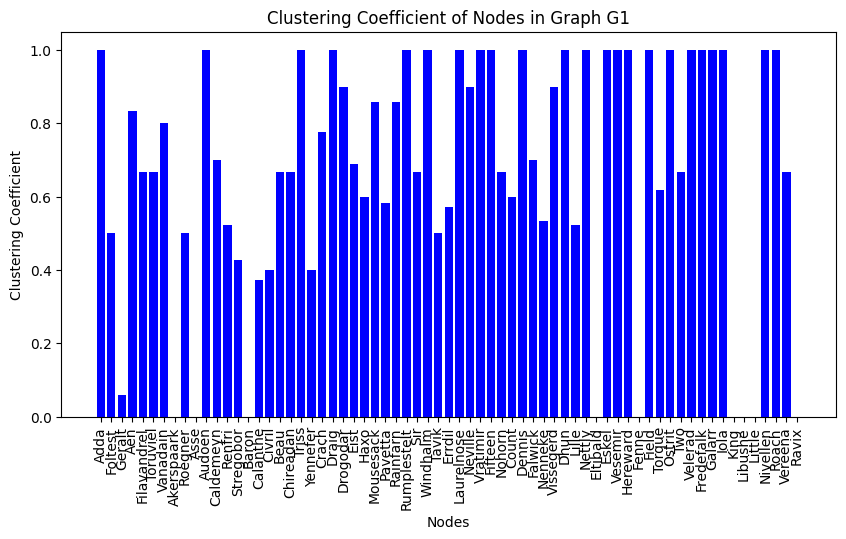

In [69]:
# BOOK 1 -> DECOMMENTA DOPO
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_1.keys()
clustering_values = clustering_coefficient_1.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [70]:
# # BOOK 2
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_2.keys()
# clustering_values = clustering_coefficient_2.values()
# plt.figure(figsize=(10,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 3
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_3.keys()
# clustering_values = clustering_coefficient_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 4
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_4.keys()
# clustering_values = clustering_coefficient_4.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 5
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_5.keys()
# clustering_values = clustering_coefficient_5.values()

# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()


# BOOK 6
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_6.keys()
# clustering_values = clustering_coefficient_6.values()
# plt.figure(figsize=(13,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

# BOOK 7
# # Assuming 'betweenness' is your computed betweenness centrality dictionary
# clustering_nodes = clustering_coefficient_7.keys()
# clustering_values = clustering_coefficient_7.values()
# plt.figure(figsize=(15,5))
# plt.bar(clustering_nodes, clustering_values, color='b')
# plt.xlabel('Nodes')
# plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficient of Nodes in Graph G7')
# plt.xticks(rotation=90)
# plt.show()

#### Correlation between Local Clustering Coefficient C_i and Degree Centrality d

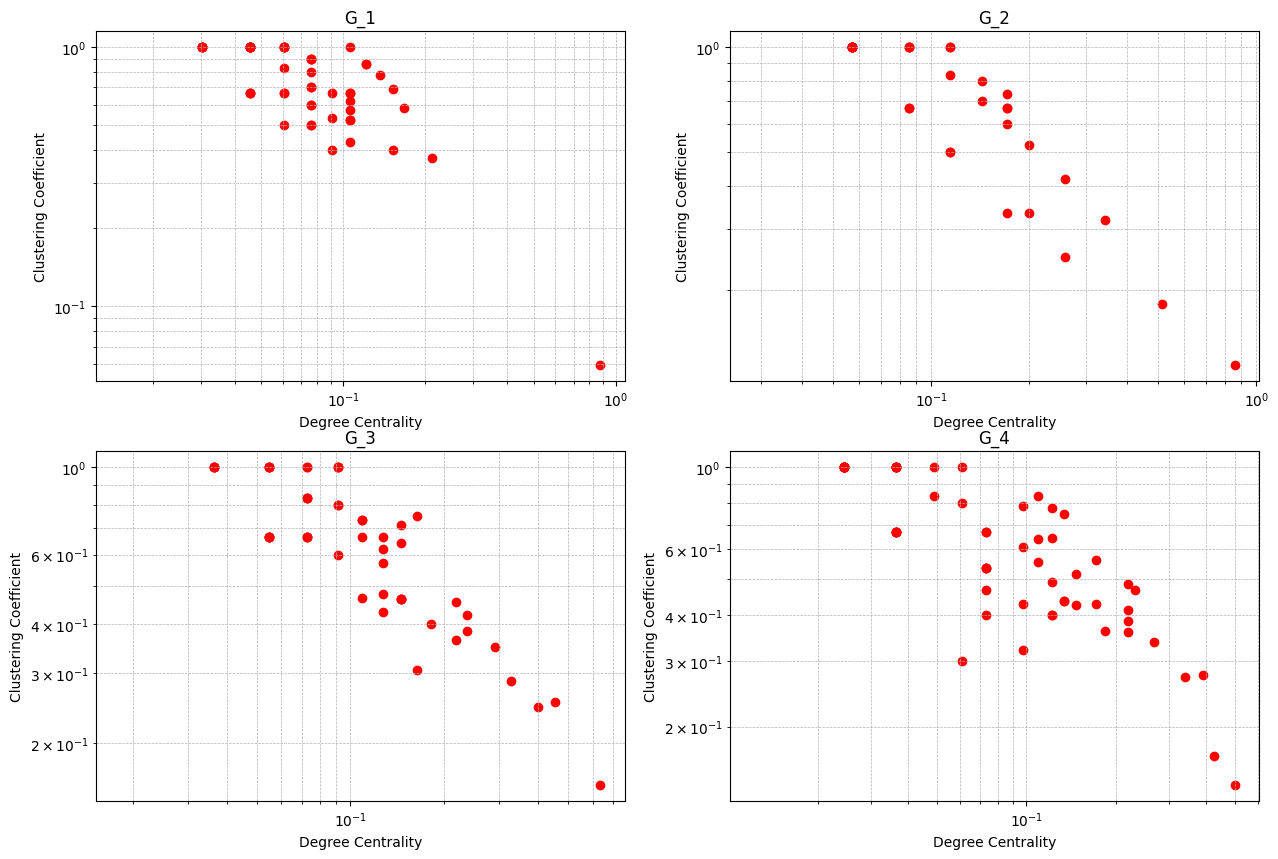

In [71]:
# from BOOK1 TO BOOK 4

degree_values_1 = list(degree_1.values())
clustering_values_1 = list(clustering_coefficient_1.values())

degree_values_2 = list(degree_2.values())
clustering_values_2 = list(clustering_coefficient_2.values())

degree_values_3 = list(degree_3.values())
clustering_values_3 = list(clustering_coefficient_3.values())

degree_values_4 = list(degree_4.values())
clustering_values_4 = list(clustering_coefficient_4.values())

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(degree_values_1, clustering_values_1, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_1')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.scatter(degree_values_2, clustering_values_2, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_2')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.scatter(degree_values_3, clustering_values_3, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_3')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.scatter(degree_values_4, clustering_values_4, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_4')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


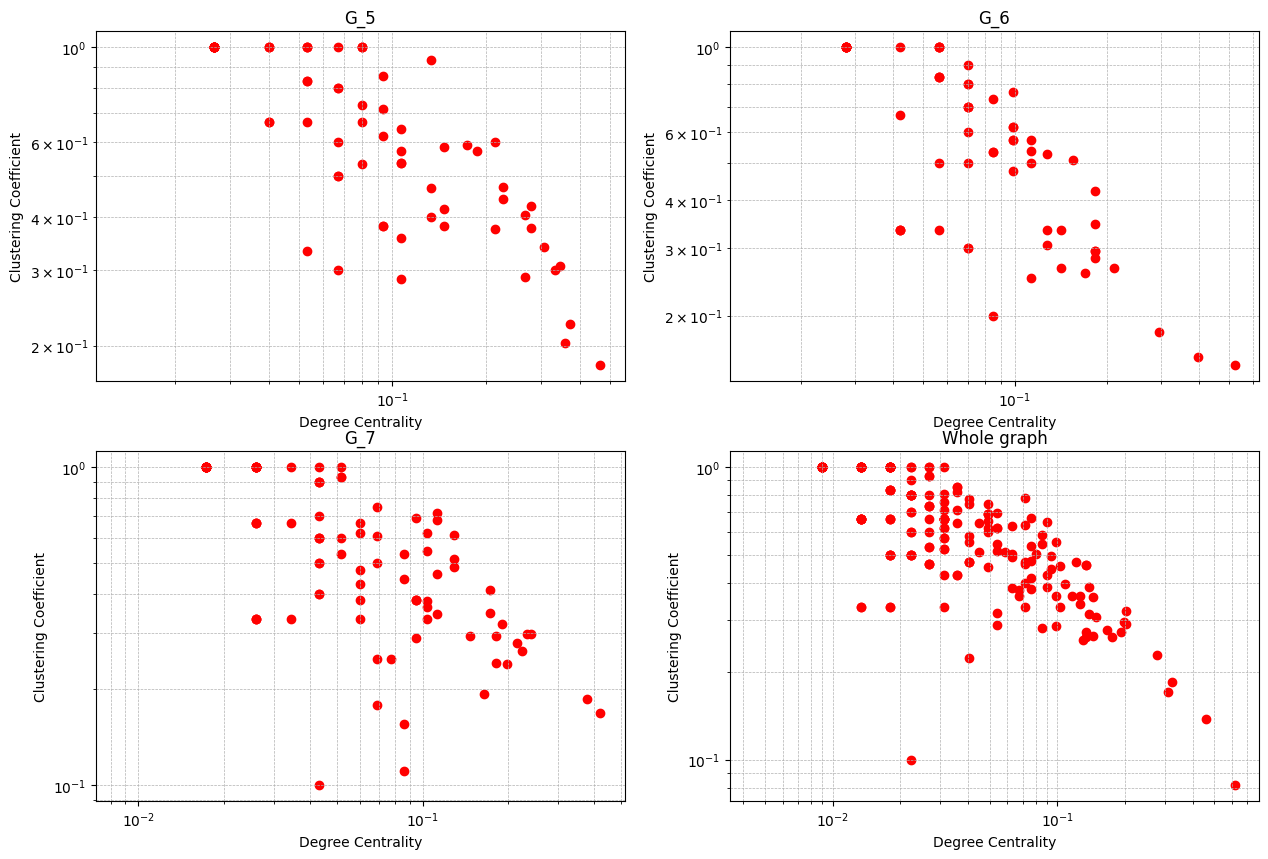

In [72]:
# from BOOK 5

degree_values_5 = list(degree_5.values())
clustering_values_5 = list(clustering_coefficient_5.values())

degree_values_6 = list(degree_6.values())
clustering_values_6 = list(clustering_coefficient_6.values())

degree_values_7 = list(degree_7.values())
clustering_values_7 = list(clustering_coefficient_7.values())

degree_values_all = list(degree_all.values())
clustering_values_all = list(clustering_coefficient_all.values())

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(degree_values_5, clustering_values_5, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_5')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 2)
plt.scatter(degree_values_6, clustering_values_6, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_6')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 3)
plt.scatter(degree_values_7, clustering_values_7, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('G_7')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(2, 2, 4)
plt.scatter(degree_values_all, clustering_values_all, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('Whole graph')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


## Structural equivalence

Structural equivalence is a count of the number of common neighbours two nodes have

In [73]:
#import sys
#np.set_printoptions(threshold=sys.maxsize) # to print the whole matrix without truncation

# Compute adjacency matrix
A_1 = nx.adjacency_matrix(G_1)
A_2 = nx.adjacency_matrix(G_2)
A_3 = nx.adjacency_matrix(G_3)
A_4 = nx.adjacency_matrix(G_4)
A_5 = nx.adjacency_matrix(G_5)
A_6 = nx.adjacency_matrix(G_6)
A_7 = nx.adjacency_matrix(G_7)


def structural_equiv(A):
  return np.inner(A.toarray(), A.toarray()) / (np.linalg.norm(A.toarray(), axis=1) * np.linalg.norm(A.toarray(), axis=1)[:, None])

# Compute structural equivalence (cosine similarity of adjacency matrix rows)
structural_equivalence_1 = structural_equiv(A_1)
structural_equivalence_2 = structural_equiv(A_2)
structural_equivalence_3 = structural_equiv(A_3)
structural_equivalence_4 = structural_equiv(A_4)
structural_equivalence_5 = structural_equiv(A_5)
structural_equivalence_6 = structural_equiv(A_6)
structural_equivalence_7 = structural_equiv(A_7)


print(structural_equivalence_7)
# put a threshold on values to select only couples of nodes with a consistent number of common neighbours

[[1.         0.2        0.63245553 ... 0.         0.         0.        ]
 [0.2        1.         0.15811388 ... 0.         0.         0.        ]
 [0.63245553 0.15811388 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## Assortative mixing by degree

In [74]:
# A positive value indicates a correlation between nodes of similar degree (high with high, low with low)
# while a negative value indicates a correlation between nodes of different degree
r_1 = nx.degree_assortativity_coefficient(G_1)

print("Degree assortativity coefficient:", r_1)
# Negative result -> high degree nodes interact more with low degree nodes
# a star-like graph (see picture on the slide)

Degree assortativity coefficient: -0.2505522119404024


In [75]:
r_1 = nx.degree_assortativity_coefficient(G_1)
r_2 = nx.degree_assortativity_coefficient(G_2)
r_3 = nx.degree_assortativity_coefficient(G_3)
r_4 = nx.degree_assortativity_coefficient(G_4)
r_5 = nx.degree_assortativity_coefficient(G_5)
r_6 = nx.degree_assortativity_coefficient(G_6)
r_7 = nx.degree_assortativity_coefficient(G_7)

print("Degree assortativity coefficient book 1:", r_1)
print("Degree assortativity coefficient book 2:", r_2)
print("Degree assortativity coefficient book 3:", r_3)
print("Degree assortativity coefficient book 4:", r_4)
print("Degree assortativity coefficient book 5:", r_5)
print("Degree assortativity coefficient book 6:", r_6)
print("Degree assortativity coefficient book 7:", r_7)

Degree assortativity coefficient book 1: -0.2505522119404024
Degree assortativity coefficient book 2: -0.3918270416897044
Degree assortativity coefficient book 3: -0.2367110202879257
Degree assortativity coefficient book 4: -0.25321777572121285
Degree assortativity coefficient book 5: -0.24594744728989135
Degree assortativity coefficient book 6: -0.1854984742624426
Degree assortativity coefficient book 7: -0.14474127323748


**do a tabella and commenta**

## Density

In [76]:
density_1 = nx.density(G_1)
density_2 = nx.density(G_2)
density_3 = nx.density(G_3)
density_4 = nx.density(G_4)
density_5 = nx.density(G_5)
density_6 = nx.density(G_6)
density_7 = nx.density(G_7)

print(density_1)
print(density_2)
print(density_3)
print(density_4)
print(density_5)
print(density_6)
print(density_7)

0.08005427408412483
0.1492063492063492
0.12727272727272726
0.08962679988245666
0.11017543859649123
0.09076682316118936
0.06660772178013558


In [77]:
import cpnet

# Load an algorithm for detecting core-periphery structure in networks
algorithm = cpnet.KM_config()

# Pass your graph object to the algorithm
algorithm.detect(G_1)

# Retrieve the results
c = algorithm.get_pair_id()  # Group ids: nodes having the same integer belong to the same group
x = algorithm.get_coreness()  # Coreness ranging between 0 and 1. A larger value indicates that the node is closer to the core

print(c)
print(x)

# display in modo carino come dataframe (SARA)
# prova a visualizzare i gruppi con diversi colori

{'Adda': 7, 'Foltest': 7, 'Geralt': 5, 'Aen': 5, 'Filavandrel': 5, 'Toruviel': 5, 'Vanadain': 5, 'Akerspaark': 1, 'Roegner': 1, 'Asse': 5, 'Audoen': 3, 'Caldemeyn': 3, 'Renfri': 3, 'Stregobor': 3, 'Baron': 3, 'Calanthe': 1, 'Civril': 3, 'Beau': 0, 'Chireadan': 0, 'Triss': 0, 'Yennefer': 0, 'Crach': 1, 'Draig': 1, 'Drogodar': 1, 'Eist': 1, 'Haxo': 1, 'Mousesack': 1, 'Pavetta': 1, 'Rainfarn': 1, 'Rumplestelt': 2, 'Sir': 2, 'Windhalm': 1, 'Tavik': 3, 'Errdil': 0, 'Laurelnose': 0, 'Neville': 0, 'Vratimir': 0, 'Fifteen': 3, 'Nohorn': 3, 'Count': 4, 'Dennis': 4, 'Falwick': 4, 'Nenneke': 4, 'Vissegerd': 1, 'Dhun': 5, 'Lille': 5, 'Nettly': 5, 'Eltibald': 5, 'Eskel': 6, 'Vesemir': 6, 'Hereward': 4, 'Fenne': 5, 'Field': 5, 'Torque': 5, 'Ostrit': 7, 'Two': 7, 'Velerad': 7, 'Fredefalk': 3, 'Galarr': 5, 'Iola': 4, 'King': 5, 'Libushe': 5, 'Little': 5, 'Nivellen': 8, 'Roach': 8, 'Vereena': 8, 'Ravix': 1}
{'Adda': 1, 'Foltest': 0, 'Geralt': 0, 'Aen': 1, 'Filavandrel': 1, 'Toruviel': 1, 'Vanadain': 1,